# Machine Learning Module Project

1.   Institution: NCI - Higher Diploma in AIML
2.   Module: Fundamentals in Machine Learning
3.   Professor/Instructor: Dr Wei Li
4.   Student: Arthur Ryan
5.   Student: number 20170386 **


# **Start of Project Code**

1.   Loading Libraries and dataset of Pet Supplies transactions
2.   Loading dataset


In [86]:
#Loading necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import missingno as msno # finds and graphs missing numbers in your dataset
#For standardizing features
from sklearn.preprocessing import StandardScaler
#For K-means and PCA modules
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action="ignore")
from numpy import array
from numpy import argmax
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
import re

#Reading the csv file

from google.colab import drive

# ***insert Dr Li's computer path / examiner's computer path

drive.mount('/content/drive/')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project for ML Module/pet_food_customer_orders.csv') # ,index_col = 0)

# ***insert Dr Li's computer path / examiner's computer path

# or if convenient use belwo code block
#import os
#current_working_directory = os.getcwd()
#print(current_working_directory)
#df = pd.read_csv('current_working_directory/pet_food_customer_orders.csv') # ,index_col = 0)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Getting first view of dataset characteristics**

In [87]:
#Cleaning of data

print("First 5 rows of each feature\n")
print(df.head())
print("\nDimensions of Dataset (rows, columns)\n")
print(df.shape)
print("\nList of the original Dataset columns\n")
print(df.columns)
print()
df.describe()
print()



First 5 rows of each feature

            customer_id               pet_id  pet_order_number  \
0  10574848487411271014  4466839344031767293                 2   
1  10574848487411271014  4466839344031767293                 1   
2  10574848487411271014  4466839344031767293                 8   
3  10574848487411271014  4466839344031767293                 4   
4  10574848487411271014  4466839344031767293                 9   

   wet_food_order_number  orders_since_first_wet_trays_order  \
0                    1.0                                 1.0   
1                    NaN                                 NaN   
2                    7.0                                 7.0   
3                    3.0                                 3.0   
4                    8.0                                 8.0   

   pet_has_active_subscription pet_food_tier            pet_signup_datetime  \
0                         True  superpremium  1970-01-01 00:00:01.552397819   
1                         True

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49042 entries, 0 to 49041
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   customer_id                                49042 non-null  uint64 
 1   pet_id                                     49042 non-null  uint64 
 2   pet_order_number                           49042 non-null  int64  
 3   wet_food_order_number                      12788 non-null  float64
 4   orders_since_first_wet_trays_order         14372 non-null  float64
 5   pet_has_active_subscription                49042 non-null  bool   
 6   pet_food_tier                              49042 non-null  object 
 7   pet_signup_datetime                        49042 non-null  object 
 8   pet_allergen_list                          10758 non-null  object 
 9   pet_fav_flavour_list                       21022 non-null  object 
 10  pet_health_issue_list 

# Data Preprocessing

**MSNO chart (missing number chart) to display that there are now no blank, Nan, missing number rows**

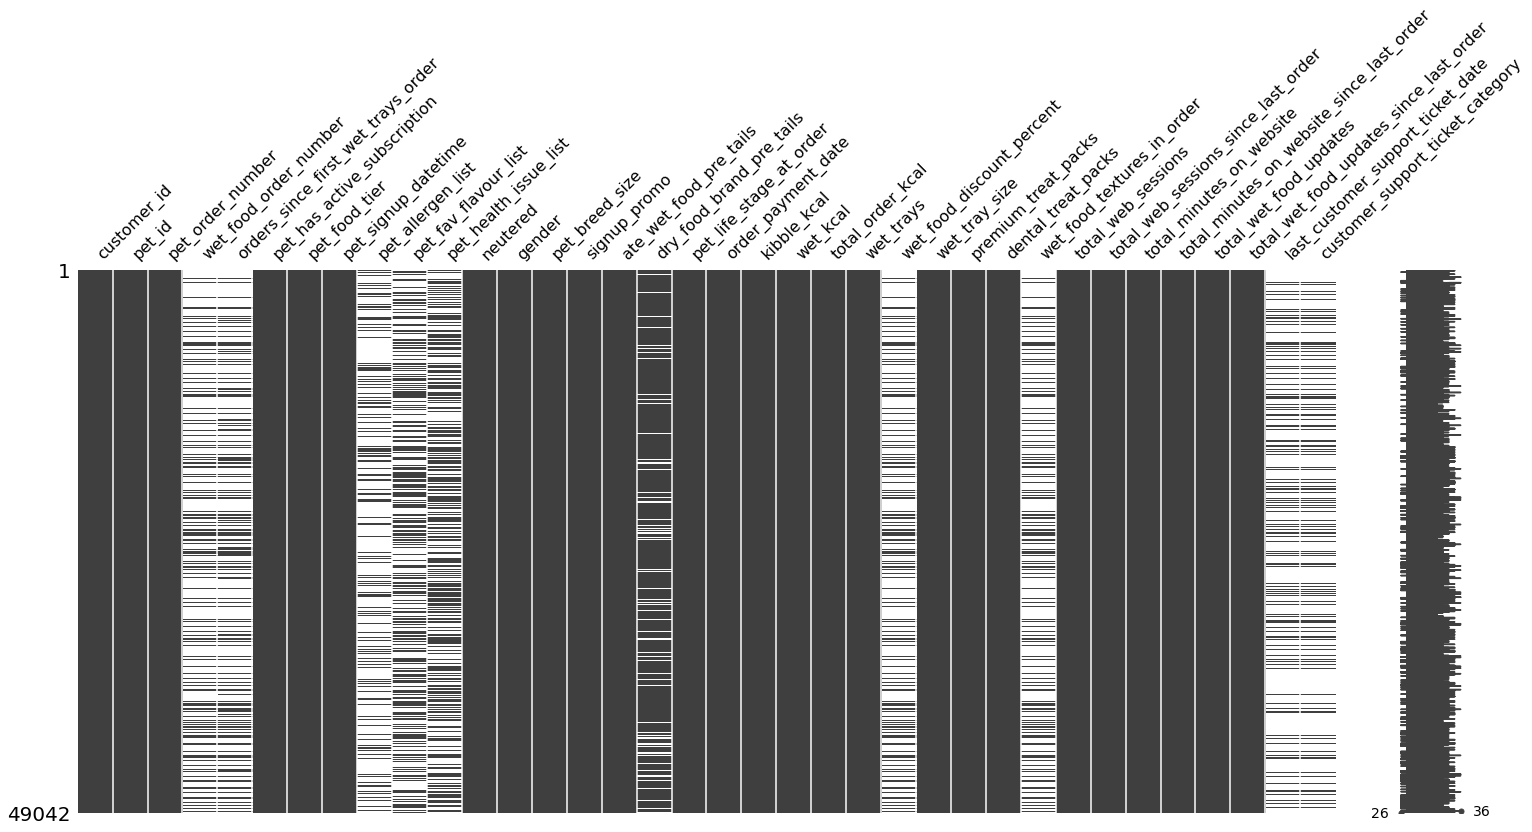

In [89]:
#Visualising the missing values
msno.matrix(df)

# Further Pre-Processing of Data

1.   removing features with null values for more than 5k rows



In [90]:
# removing any feature with greater than 6k missing rows/values

del df['wet_food_order_number']
del df['orders_since_first_wet_trays_order']
del df['pet_allergen_list']
del df['pet_fav_flavour_list']
del df['pet_health_issue_list']
del df['wet_food_discount_percent']
del df['wet_food_textures_in_order']
del df['last_customer_support_ticket_date']
del df['customer_support_ticket_category']
del df['dry_food_brand_pre_tails']

df.info()
print()
df.isnull().sum()
print()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49042 entries, 0 to 49041
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   customer_id                                49042 non-null  uint64 
 1   pet_id                                     49042 non-null  uint64 
 2   pet_order_number                           49042 non-null  int64  
 3   pet_has_active_subscription                49042 non-null  bool   
 4   pet_food_tier                              49042 non-null  object 
 5   pet_signup_datetime                        49042 non-null  object 
 6   neutered                                   49042 non-null  bool   
 7   gender                                     49042 non-null  object 
 8   pet_breed_size                             49042 non-null  object 
 9   signup_promo                               49042 non-null  object 
 10  ate_wet_food_pre_tails

customer_id        pet_id  pet_order_number    kibble_kcal  \
count  4.904200e+04  4.904200e+04      49042.000000   49042.000000   
mean   9.237652e+18  9.252460e+18          3.506545   19764.538353   
std    5.273450e+18  5.296804e+18          2.864754   13255.889361   
min    1.969421e+15  3.629657e+14          1.000000     597.112000   
25%    4.748268e+18  4.648948e+18          1.000000   10127.275000   
50%    9.196879e+18  9.318042e+18          3.000000   16423.389500   
75%    1.380478e+19  1.378622e+19          5.000000   26392.896500   
max    1.844219e+19  1.844234e+19         20.000000  168958.655000   

           wet_kcal  total_order_kcal     wet_trays  premium_treat_packs  \
count  49042.000000      49042.000000  49042.000000         49042.000000   
mean     861.480384      20790.572013      5.432140             0.087354   
std     1903.275965      13382.099355     10.888737             0.471183   
min        0.000000       1481.660000      0.000000             0.000000   
25%        0.000000      11099.017000      0.000000             0.000000   
50%        0.000000      17540.532000      0.000000             0.000000   
75%      973.350000      27645.782250      8.000000             0.000000   
max    55914.900000     168958.655000    248.000000            23.000000   

       dental_treat_packs  total_web_sessions  \
count        49042.000000        49042.000000   
mean             0.275641            7.962298   
std              0.951677            9.732376   
min              0.000000            0.000000   
25%              0.000000            1.000000   
50%              0.000000            5.000000   
75%              0.000000           11.000000   
max             20.000000          124.000000   

       total_web_sessions_since_last_order  total_minutes_on_website  \
count                         49042.000000              49042.000000   
mean                              2.036479                383.583969   
std                               2.619178                822.173863   
min                               0.000000                  0.000000   
25%                               0.000000                 18.000000   
50%                               1.000000                 59.000000   
75%                               3.000000                433.000000   
max                              51.000000              23734.000000   

       total_minutes_on_website_since_last_order  total_wet_food_updates  \
count                               49042.000000            49042.000000   
mean                                   92.716468                0.045410   
std                                   291.262819                0.316929   
min                                     0.000000                0.000000   
25%                                     0.000000                0.000000   
50%                                     2.000000                0.000000   
75%                                    17.000000                0.000000   
max                                  8203.000000                9.000000   

       total_wet_food_updates_since_last_order  
count                             49042.000000  
mean                                  0.030158  
std                                   0.246854  
min                                   0.000000  
25%                                   0.000000  
50%                                   0.000000  
75%                                   0.000000  
max                                   9.000000

# **Remove Identification by Customer and Pet to aid K means clustering**

In [91]:
del df['customer_id']
del df['pet_id']

# **Clarifying that there are no null rows in the dataset now**

In [92]:
df.isnull().sum()

pet_order_number                             0
pet_has_active_subscription                  0
pet_food_tier                                0
pet_signup_datetime                          0
neutered                                     0
gender                                       0
pet_breed_size                               0
signup_promo                                 0
ate_wet_food_pre_tails                       0
pet_life_stage_at_order                      0
order_payment_date                           0
kibble_kcal                                  0
wet_kcal                                     0
total_order_kcal                             0
wet_trays                                    0
wet_tray_size                                0
premium_treat_packs                          0
dental_treat_packs                           0
total_web_sessions                           0
total_web_sessions_since_last_order          0
total_minutes_on_website                     0
total_minutes

# **Visualising the Features but to visually show there are no Null rows**

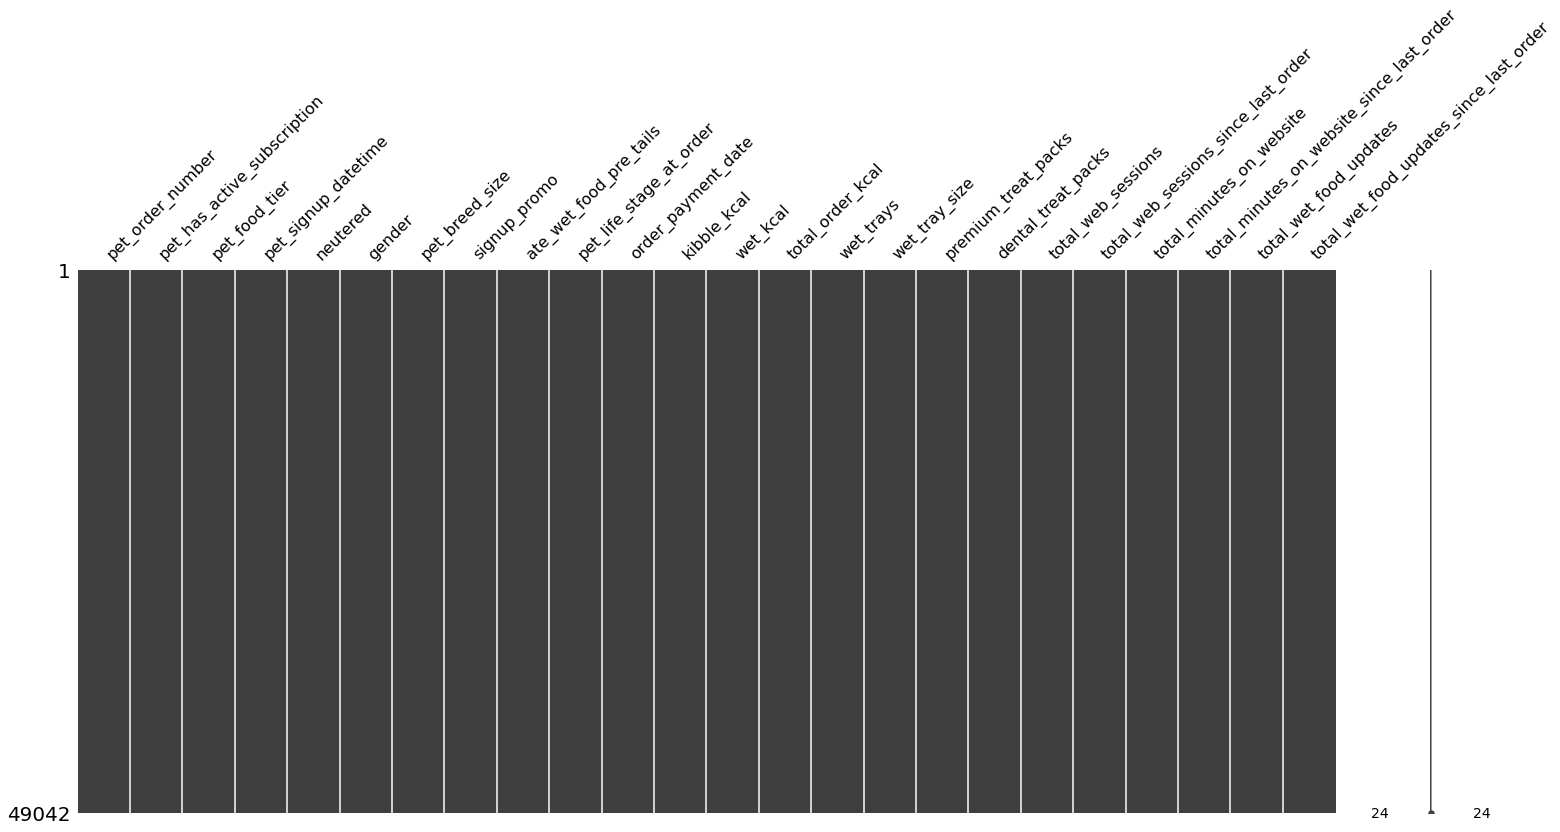

In [93]:
#Visualising the missing values
msno.matrix(df)

# **Cleaning of Data**

In [94]:
#Cleaning of data

print("First 5 rows of each feature\n")
print(df.head())
print("\nDimensions of Dataset (rows, columns)\n")
print(df.shape)
print("\nList of the original Dataset columns\n")
print(df.columns)
print()
df.describe()
print()

# strips 'g' , 'None', 'Both' from 'wet_tray_size'
df['wet_tray_size'].head(5)
df['wet_tray_size'].replace('g', '', regex=True, inplace=True)
df['wet_tray_size'].replace('None', 0, regex=True, inplace=True)
df['wet_tray_size'].replace('Both', ((300-150)/2)+150, regex=True, inplace=True)

# DO NOT USE THIS LINE AS IT CAUSES EVERYTHING TO BE 50:50 # df.replace('None', 0, regex=True, inplace=True)

## Assert that there is no missing value: - Logic test is features are full or empty
# assert pd.notnull(df).all().all()

# convert 'wet_tray_size' to data type integer
df['wet_tray_size'] = df['wet_tray_size'].astype(int) 

First 5 rows of each feature

   pet_order_number  pet_has_active_subscription pet_food_tier  \
0                 2                         True  superpremium   
1                 1                         True  superpremium   
2                 8                         True  superpremium   
3                 4                         True  superpremium   
4                 9                         True  superpremium   

             pet_signup_datetime  neutered  gender pet_breed_size  \
0  1970-01-01 00:00:01.552397819      True  female          large   
1  1970-01-01 00:00:01.552397819      True  female          large   
2  1970-01-01 00:00:01.552397819      True  female          large   
3  1970-01-01 00:00:01.552397819      True  female          large   
4  1970-01-01 00:00:01.552397819      True  female          large   

     signup_promo  ate_wet_food_pre_tails pet_life_stage_at_order  \
0  Null & Default                    True                  mature   
1  Null & Default   

# Data Visualisation - to try to see if there are any patterns or relationships in the data.  

Text(0.5, 0, 'Neutered ; 0=No ; 1=Yes')

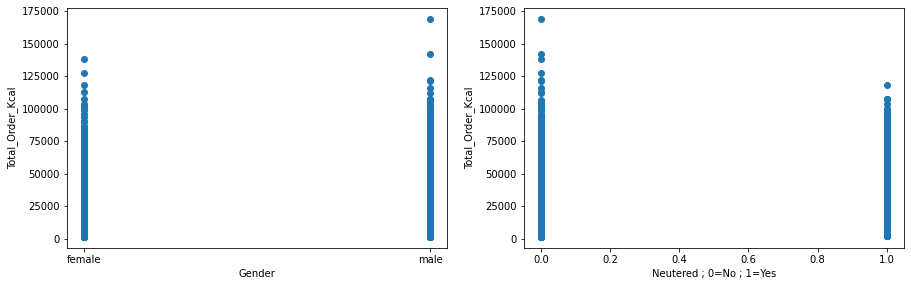

In [95]:
#Visualising the Raw data

# kibble_kcal  wet_kcal  total_order_kcal

f, axs = plt.subplots(1,2,figsize=(15,15))
# plt.figure(figsize=(13,10))
plt.subplot(3, 2, 1)
plt.scatter(df['gender'].iloc[:], df['total_order_kcal'].iloc[:])
plt.ylabel('Total_Order_Kcal')
plt.xlabel('Gender')
plt.subplot(3, 2, 2)
plt.scatter(df['neutered'].iloc[:], df['total_order_kcal'].iloc[:])
plt.ylabel('Total_Order_Kcal')
plt.xlabel('Neutered ; 0=No ; 1=Yes')

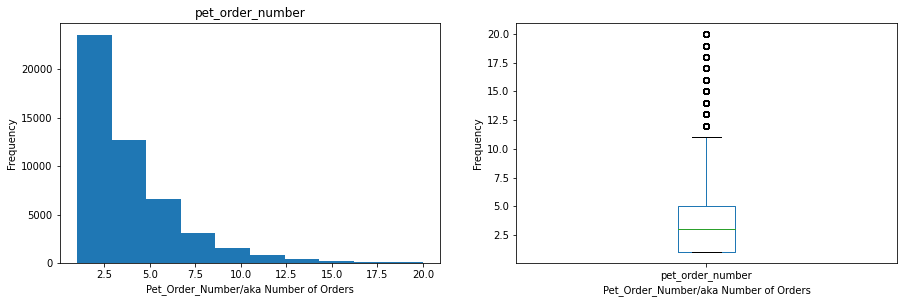

In [96]:
# 1st Block of plots

f, axs = plt.subplots(1,2,figsize=(15,15))

# 1st Block of plots
plt.subplot(3, 2, 1)
df['pet_order_number'].plot(kind='hist', title='pet_order_number')
plt.xlabel('Pet_Order_Number/aka Number of Orders')
plt.subplot(3, 2, 2)
df['pet_order_number'].plot(kind='box')
plt.xlabel('Pet_Order_Number/aka Number of Orders')
plt.ylabel('Frequency')
plt.show()


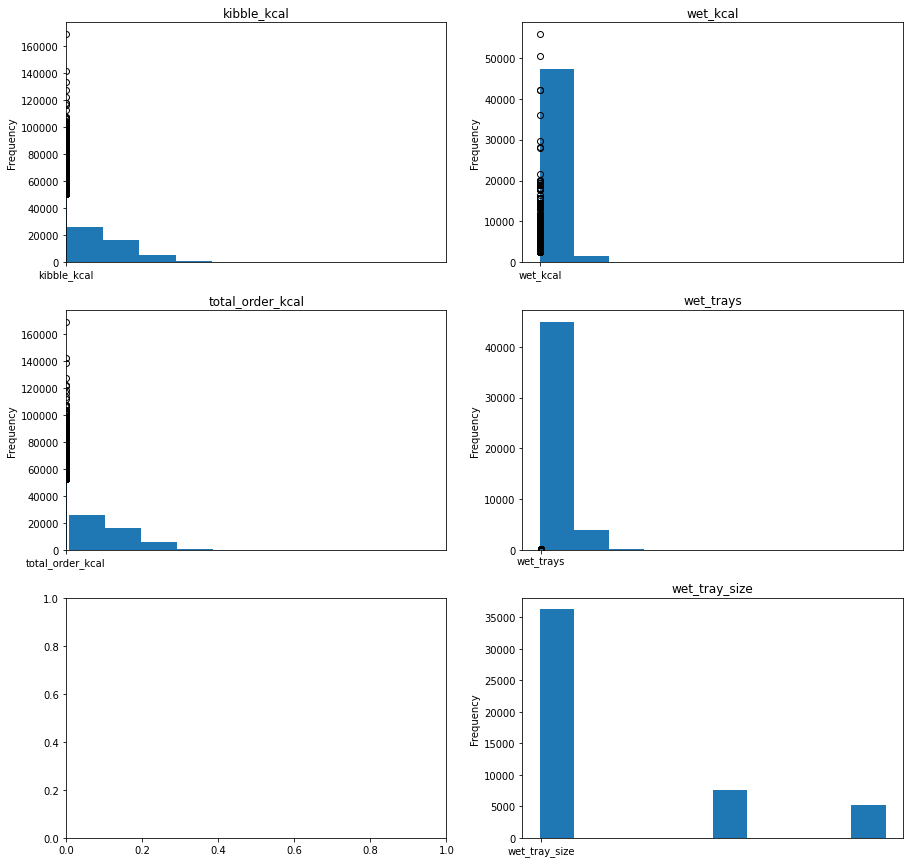

In [97]:
# 2nd block of plots
f, axs = plt.subplots(3,2,figsize=(15,15))

plt.subplot(3, 2, 1)
df['kibble_kcal'].plot(kind='hist', title='kibble_kcal')
plt.subplot(3, 2, 1)
df['kibble_kcal'].plot(kind='box')
plt.subplot(3, 2, 2)
df['wet_kcal'].plot(kind='hist', title='wet_kcal')
plt.subplot(3, 2, 2)
df['wet_kcal'].plot(kind='box')
plt.subplot(3, 2, 3)
df['total_order_kcal'].plot(kind='hist', title='total_order_kcal')
plt.subplot(3, 2, 3)
df['total_order_kcal'].plot(kind='box')
plt.subplot(3, 2, 4)
df['wet_trays'].plot(kind='hist', title='wet_trays')
plt.subplot(3, 2, 4)
df['wet_trays'].plot(kind='box')
plt.subplot(3, 2, 5)
#df['wet_food_discount_percent'].plot(kind='hist', title='wet_food_discount_percent')
#plt.subplot(3, 2, 5)
#df['wet_food_discount_percent'].plot(kind='box')
plt.subplot(3, 2, 6)
df['wet_tray_size'].plot(kind='hist', title='wet_tray_size')
plt.subplot(3, 2, 6)
df['wet_tray_size'].plot(kind='box')

plt.show()

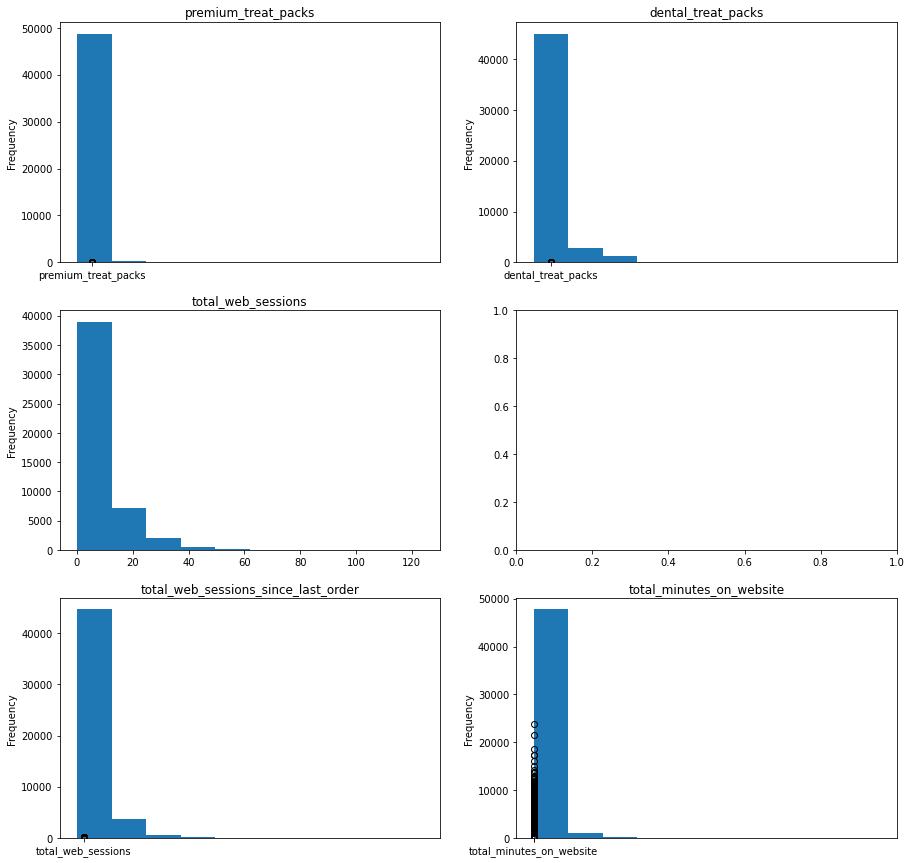

In [98]:
# 3rd Block of plots
f, axs = plt.subplots(3,2,figsize=(15,15))

plt.subplot(3, 2, 1)
df['premium_treat_packs'].plot(kind='hist', title='premium_treat_packs')
plt.subplot(3, 2, 1)
df['premium_treat_packs'].plot(kind='box')
plt.subplot(3, 2, 2)
df['dental_treat_packs'].plot(kind='hist', title='dental_treat_packs')
plt.subplot(3, 2, 2)
df['dental_treat_packs'].plot(kind='box')
plt.subplot(3, 2, 3)
#df['wet_food_textures_in_order'].plot(kind='hist', title='wet_food_textures_in_order')
#plt.subplot(3, 2, 4)
#df['wet_food_textures_in_order'].plot(kind='box')
#plt.subplot(3, 2, 4)
df['total_web_sessions'].plot(kind='hist', title='total_web_sessions')
plt.subplot(3, 2, 5)
df['total_web_sessions'].plot(kind='box')
plt.subplot(3, 2, 5)
df['total_web_sessions_since_last_order'].plot(kind='hist', title='total_web_sessions_since_last_order')
plt.subplot(3, 2, 6)
df['total_web_sessions_since_last_order'].plot(kind='box')
plt.subplot(3, 2, 6)
df['total_minutes_on_website'].plot(kind='hist', title='total_minutes_on_website')
plt.subplot(3, 2, 6)
df['total_minutes_on_website'].plot(kind='box')

plt.show()

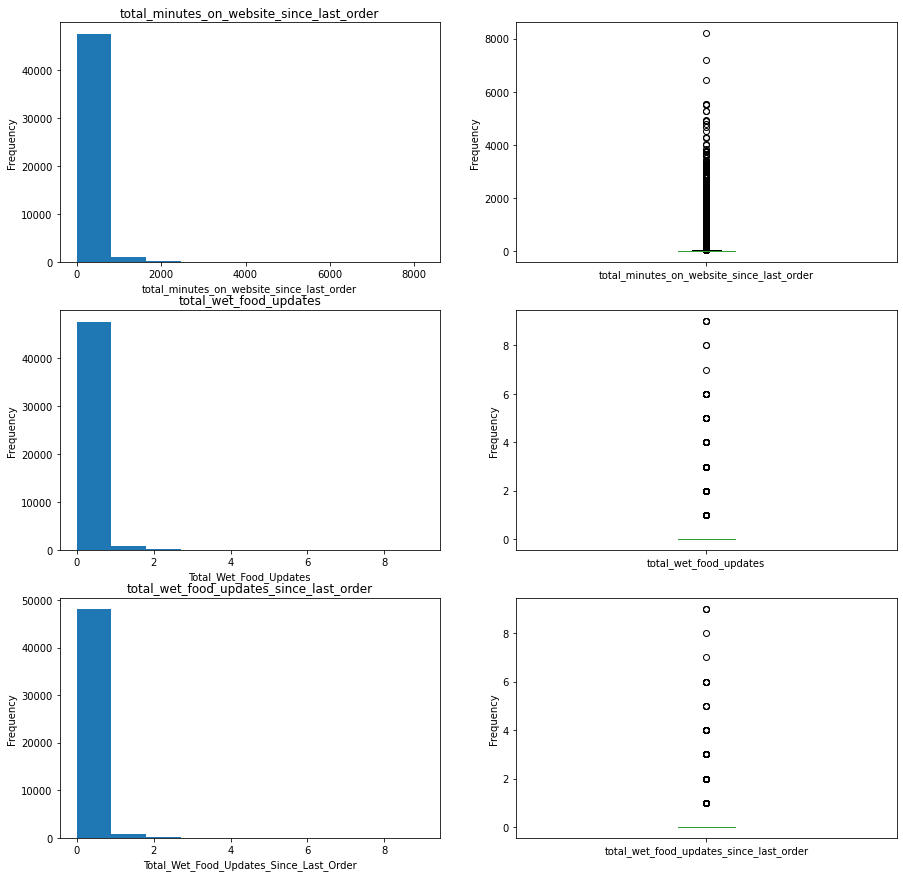

In [99]:
# 4th Block of plots
f, axs = plt.subplots(3,2,figsize=(15,15))

plt.subplot(3, 2, 1)
df['total_minutes_on_website_since_last_order'].plot(kind='hist', title='total_minutes_on_website_since_last_order')
plt.xlabel('total_minutes_on_website_since_last_order')
plt.subplot(3, 2, 2)
plt.ylabel('Frequency')
df['total_minutes_on_website_since_last_order'].plot(kind='box')
print()
print()
plt.subplot(3, 2, 3)
plt.ylabel('Frequency')
plt.xlabel('Total_Wet_Food_Updates')
df['total_wet_food_updates'].plot(kind='hist', title='total_wet_food_updates')
plt.subplot(3, 2, 4)
plt.ylabel('Frequency')
df['total_wet_food_updates'].plot(kind='box')
plt.subplot(3, 2, 5)
plt.ylabel('Frequency')
plt.xlabel('Total_Wet_Food_Updates_Since_Last_Order')
df['total_wet_food_updates_since_last_order'].plot(kind='hist', title='total_wet_food_updates_since_last_order')
plt.subplot(3, 2, 6)
plt.ylabel('Frequency')
df['total_wet_food_updates_since_last_order'].plot(kind='box')
#plt.subplot(3, 2, 4)
#df['last_customer_support_ticket_date'].plot(kind='hist', title='last_customer_support_ticket_date')
#plt.subplot(3, 2, 4)
#df['last_customer_support_ticket_date'].plot(kind='box')
#plt.subplot(3, 2, 5)
#df['customer_support_ticket_category'].plot(kind='hist', title='customer_support_ticket_category')
#plt.subplot(3, 2, 5)
#df['customer_support_ticket_category'].plot(kind='box')

plt.show()

In [100]:
print(df)
df.head(5)

       pet_order_number  pet_has_active_subscription pet_food_tier  \
0                     2                         True  superpremium   
1                     1                         True  superpremium   
2                     8                         True  superpremium   
3                     4                         True  superpremium   
4                     9                         True  superpremium   
...                 ...                          ...           ...   
49037                 1                         True  superpremium   
49038                 1                        False  superpremium   
49039                 1                        False       premium   
49040                 1                        False           mid   
49041                 1                         True           mid   

                 pet_signup_datetime  neutered  gender pet_breed_size  \
0      1970-01-01 00:00:01.552397819      True  female          large   
1      1970-0

pet_order_number  pet_has_active_subscription pet_food_tier  \
0                 2                         True  superpremium   
1                 1                         True  superpremium   
2                 8                         True  superpremium   
3                 4                         True  superpremium   
4                 9                         True  superpremium   

             pet_signup_datetime  neutered  gender pet_breed_size  \
0  1970-01-01 00:00:01.552397819      True  female          large   
1  1970-01-01 00:00:01.552397819      True  female          large   
2  1970-01-01 00:00:01.552397819      True  female          large   
3  1970-01-01 00:00:01.552397819      True  female          large   
4  1970-01-01 00:00:01.552397819      True  female          large   

     signup_promo  ate_wet_food_pre_tails pet_life_stage_at_order  \
0  Null & Default                    True                  mature   
1  Null & Default                    True                  mature   
2  Null & Default                    True                  mature   
3  Null & Default                    True                  mature   
4  Null & Default                    True                  mature   

              order_payment_date  kibble_kcal  wet_kcal  total_order_kcal  \
0  2019-04-11 00:00:00.000000000    36876.724   1234.65         38111.374   
1  2019-03-18 00:00:00.000000000    21419.305      0.00         21419.305   
2  2019-10-27 00:00:00.000000000    18352.836   6624.00         24976.836   
3  2019-05-20 00:00:00.000000000    36617.214   2901.90         39519.114   
4  2019-11-20 00:00:00.000000000    18340.300   6624.00         24964.300   

   wet_trays  wet_tray_size  premium_treat_packs  dental_treat_packs  \
0         11            150                    0                   0   
1          0              0                    0                   0   
2         60            150                    0                   0   
3         26            150                    0                   0   
4         60            150                    0                   0   

   total_web_sessions  total_web_sessions_since_last_order  \
0                   6                                    4   
1                   2                                    1   
2                  18                                    0   
3                  13                                    6   
4                  19                                    1   

   total_minutes_on_website  total_minutes_on_website_since_last_order  \
0                       101                                         32   
1                        69                                          3   
2                       184                                          0   
3                       130                                         15   
4                       184                                          0   

   total_wet_food_updates  total_wet_food_updates_since_last_order  
0                       0                                        0  
1                       0                                        0  
2                       0                                        0  
3                       0                                        0  
4                       0                                        0

# **Pie Charts to get orientation i.e. overall picture of the data**

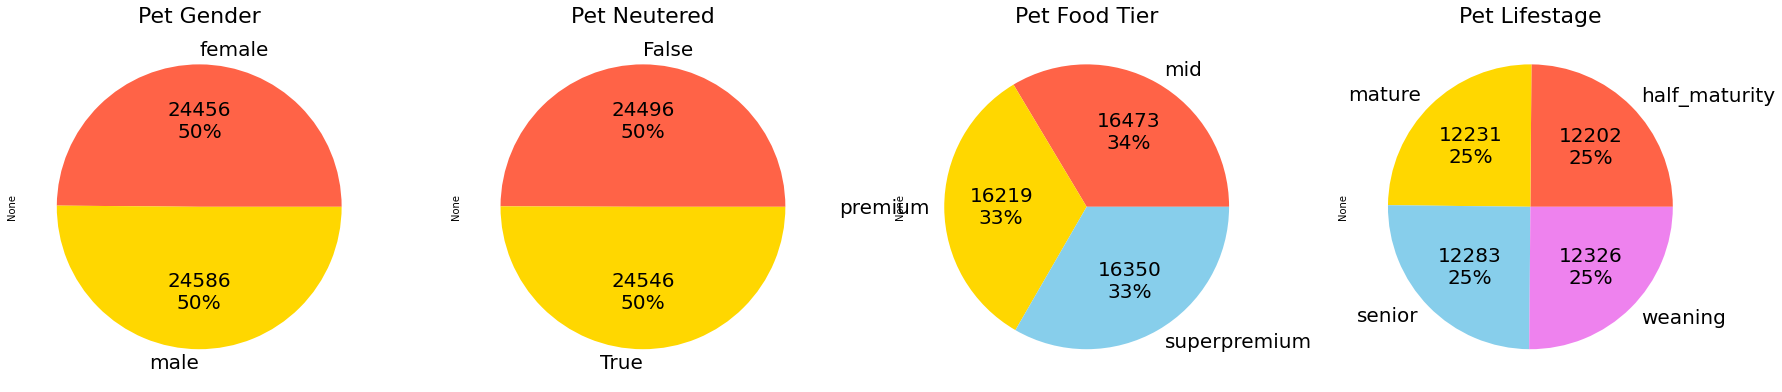

In [101]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

N = len(df)
#df_food = pd.DataFrame({'pet_food_tier_pie': np.random.choice(['mid','premium','superpremium'], N)})
#df_gender = pd.DataFrame({'pet_gender_pie': np.random.choice(['female','male'], N)})
#df_neutered = pd.DataFrame({'pet_neutered_pie': np.random.choice(['True','False'], N)})
#df_lifestage = pd.DataFrame({'pet_life_stage_at_order_pie': np.random.choice(['half_maturity', 'mature', 'weaning', 'senior'], N)})

df_food = pd.DataFrame({'pet_food_tier': np.random.choice(['mid','premium','superpremium'], N)})
df_gender = pd.DataFrame({'gender': np.random.choice(['female','male'], N)})
df_neutered = pd.DataFrame({'neutered': np.random.choice(['True','False'], N)})
df_lifestage = pd.DataFrame({'pet_life_stage_at_order': np.random.choice(['half_maturity', 'mature', 'weaning', 'senior'], N)})



fig, (ax2, ax3, ax1, ax4) = plt.subplots(ncols=4,figsize=(25, 25))

df_food.groupby('pet_food_tier').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['tomato', 'gold', 'skyblue','violet', 'lime'], ax=ax1)

df_gender.groupby('gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['tomato', 'gold', 'skyblue','violet', 'lime'], ax=ax2)

df_neutered.groupby('neutered').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['tomato', 'gold', 'skyblue','violet', 'lime'], ax=ax3)

df_lifestage.groupby('pet_life_stage_at_order').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['tomato', 'gold', 'skyblue','violet', 'lime'], ax=ax4)


#ax1.set_ylabel('Pet Food Tier', size=22, loc="center left")
ax1.set_title('Pet Food Tier', size=22)
# ax2.set_ylabel('Per gender', size=22)
ax2.set_title('Pet Gender', size=22)
ax3.set_title('Pet Neutered', size=22)
ax4.set_title('Pet Lifestage', size=22)

plt.tight_layout()
#plt.show()

# Visualising using Correlation Matrix

1.   Note - white space is traced back to the values in the corresponding features being too low


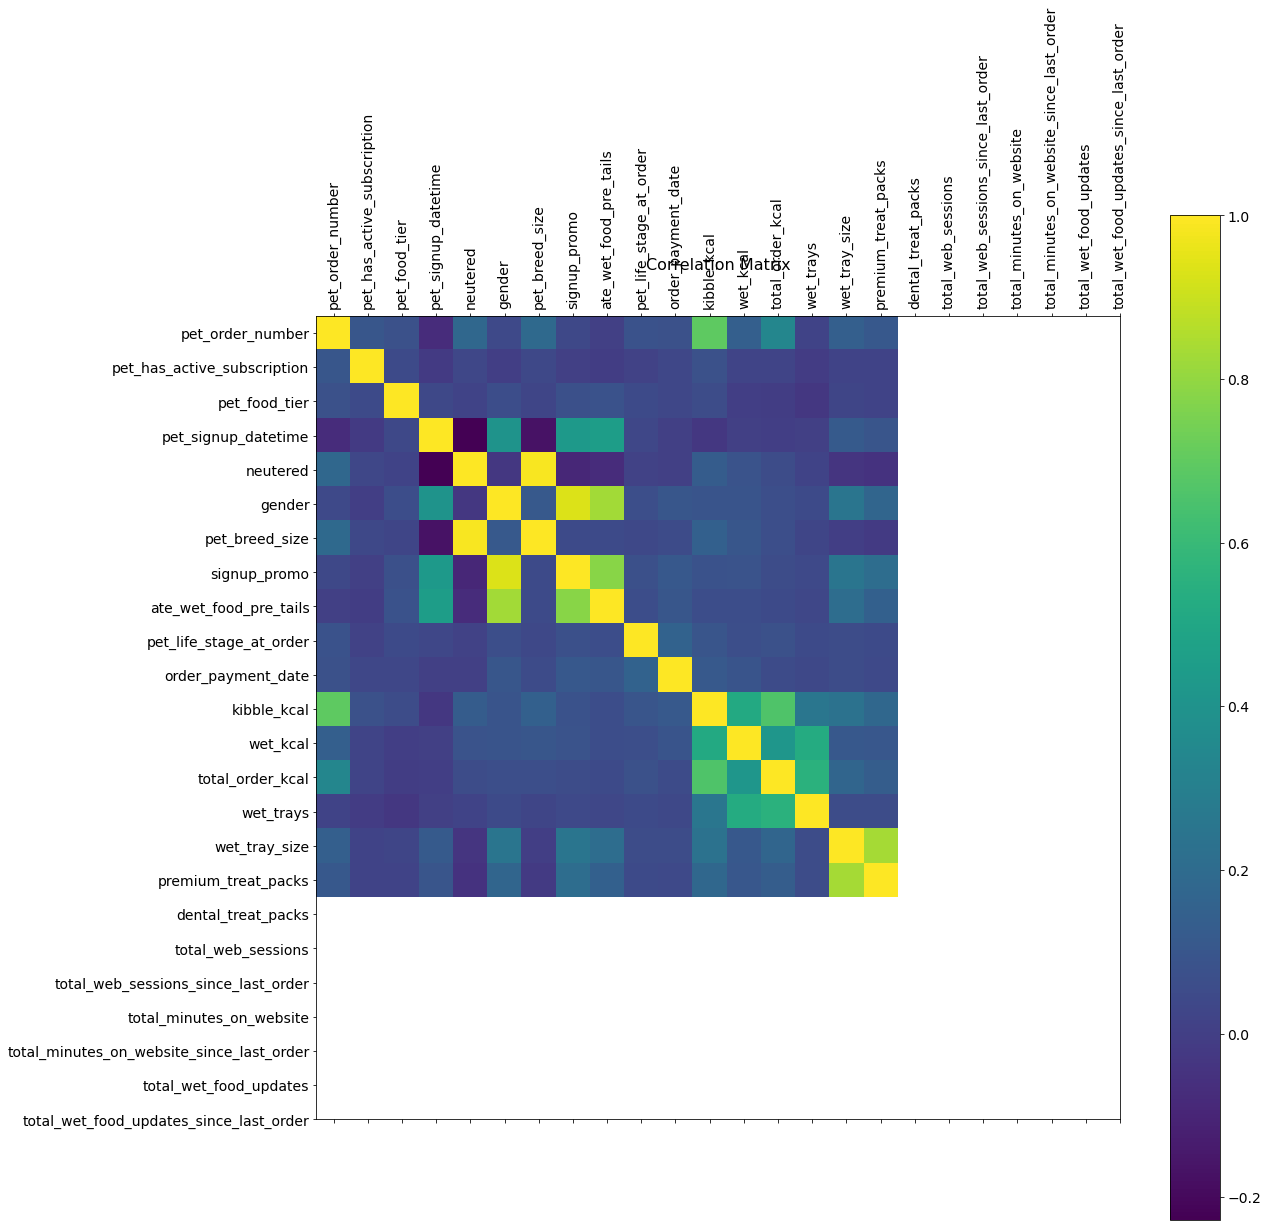

In [102]:
#Correlation verification
f = plt.figure(figsize=(18, 18))
plt.matshow(df.corr(), fignum=f.number) # part that shows correlation ie feeds the correclationtot he graph plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16, loc='center');
plt.savefig('Correlation Matrix.png')

In [103]:
df.head(10)

pet_order_number  pet_has_active_subscription pet_food_tier  \
0                 2                         True  superpremium   
1                 1                         True  superpremium   
2                 8                         True  superpremium   
3                 4                         True  superpremium   
4                 9                         True  superpremium   
5                 6                         True       premium   
6                 3                         True       premium   
7                 9                         True       premium   
8                 1                         True       premium   
9                 7                         True       premium   

             pet_signup_datetime  neutered  gender pet_breed_size  \
0  1970-01-01 00:00:01.552397819      True  female          large   
1  1970-01-01 00:00:01.552397819      True  female          large   
2  1970-01-01 00:00:01.552397819      True  female          large   
3  1970-01-01 00:00:01.552397819      True  female          large   
4  1970-01-01 00:00:01.552397819      True  female          large   
5  1970-01-01 00:00:01.551530404      True  female         medium   
6  1970-01-01 00:00:01.551530404      True  female         medium   
7  1970-01-01 00:00:01.551530404      True  female         medium   
8  1970-01-01 00:00:01.551530404      True  female         medium   
9  1970-01-01 00:00:01.551530404      True  female         medium   

     signup_promo  ate_wet_food_pre_tails pet_life_stage_at_order  \
0  Null & Default                    True                  mature   
1  Null & Default                    True                  mature   
2  Null & Default                    True                  mature   
3  Null & Default                    True                  mature   
4  Null & Default                    True                  mature   
5  Refer a Friend                    True                  mature   
6  Refer a Friend                    True                  mature   
7  Refer a Friend                    True                  mature   
8  Refer a Friend                    True                  mature   
9  Refer a Friend                    True                  mature   

              order_payment_date  kibble_kcal  wet_kcal  total_order_kcal  \
0  2019-04-11 00:00:00.000000000    36876.724   1234.65         38111.374   
1  2019-03-18 00:00:00.000000000    21419.305      0.00         21419.305   
2  2019-10-27 00:00:00.000000000    18352.836   6624.00         24976.836   
3  2019-05-20 00:00:00.000000000    36617.214   2901.90         39519.114   
4  2019-11-20 00:00:00.000000000    18340.300   6624.00         24964.300   
5  2019-08-15 00:00:00.000000000    14435.990      0.00         14435.990   
6  2019-05-05 00:00:00.000000000     9982.410      0.00          9982.410   
7  2019-12-04 00:00:00.000000000    14364.790      0.00         14725.590   
8  2019-03-07 00:00:00.000000000    10012.050      0.00         10012.050   
9  2019-09-25 00:00:00.000000000    14348.890      0.00         14348.890   

   wet_trays  wet_tray_size  premium_treat_packs  dental_treat_packs  \
0         11            150                    0                   0   
1          0              0                    0                   0   
2         60            150                    0                   0   
3         26            150                    0                   0   
4         60            150                    0                   0   
5          0              0                    0                   0   
6          0              0                    0                   0   
7          0              0                    0                   0   
8          0              0                    0                   0   
9          0              0                    0                   0   

   total_web_sessions  total_web_sessions_since_last_order  \
0                   6                                

# **One-Hot Encode the Categorical Data Features**

In [104]:
# Code to add encoding one block of 12 at a time

import numpy as np
from itertools import chain

# 'pet_food_tier'
labels = np.unique(list(chain(*df['pet_food_tier'].map(lambda x: x.split('|')).tolist())))
labels = [x for x in labels if len(x) > 0]
labels

for label in labels:
    if len(label) > 1:
        df[label] = df['pet_food_tier'].map(lambda finding: 1.0 if label in finding else 0.0)


# 'pet_fav_flavour_list'
#labels = np.unique(list(chain(*df['pet_fav_flavour_list'].map(lambda x: x.split('|')).tolist())))
#labels = [x for x in labels if len(x) > 0]
#labels
#for label in labels:
#    if len(label) > 1:
#        df[label] = df['pet_fav_flavour_list'].map(lambda finding: 1.0 if label in finding else 0.0)


# 'pet_health_issue_list'
#labels = np.unique(list(chain(*df['pet_health_issue_list'].map(lambda x: x.split('|')).tolist())))
#labels = [x for x in labels if len(x) > 0]
#labels
#for label in labels:
#    if len(label) > 1:
#        df[label] = df['pet_health_issue_list'].map(lambda finding: 1.0 if label in finding else 0.0)


# 'neutered' - Boolean no attributre split
df['neutered'] = df['neutered'].astype(str)
labels = np.unique(list(chain(*df['neutered'].map(lambda x: x.split('|')).tolist())))
labels = [x for x in labels if len(x) > 0]
labels

for label in labels:
    if len(label) > 1:
        df['neutered_'+label] = df['neutered'].map(lambda finding: 1.0 if label in finding else 0.0)


# 'gender'
labels = np.unique(list(chain(*df['gender'].map(lambda x: x.split('|')).tolist())))
labels = [x for x in labels if len(x) > 0]
labels

for label in labels:
    if len(label) > 1:
        df[label] = df['gender'].map(lambda finding: 1.0 if label in finding else 0.0)


# 'pet_breed_size'
labels = np.unique(list(chain(*df['pet_breed_size'].map(lambda x: x.split('|')).tolist())))
labels = [x for x in labels if len(x) > 0]
labels

for label in labels:
    if len(label) > 1:
        df[label] = df['pet_breed_size'].map(lambda finding: 1.0 if label in finding else 0.0)


# 'signup_promo'
labels = np.unique(list(chain(*df['signup_promo'].map(lambda x: x.split('|')).tolist())))
labels = [x for x in labels if len(x) > 0]
labels

for label in labels:
    if len(label) > 1:
        df[label] = df['signup_promo'].map(lambda finding: 1.0 if label in finding else 0.0)


# 'ate_wet_food_pre_tails' - Boolean has no object split
df['ate_wet_food_pre_tails'] = df['ate_wet_food_pre_tails'].astype(str)

labels = np.unique(list(chain(*df['ate_wet_food_pre_tails'].map(lambda x: x.split('|')).tolist())))
labels = [x for x in labels if len(x) > 0]
labels

for label in labels:
    if len(label) > 1:
        df[label] = df['ate_wet_food_pre_tails'].map(lambda finding: 1.0 if label in finding else 0.0)


# 'dry_food_brand_pre_tails'
#labels = np.unique(list(chain(*df['dry_food_brand_pre_tails'].map(lambda x: x.split('|')).tolist())))
#labels = [x for x in labels if len(x) > 0]
#labels
#for label in labels:
#    if len(label) > 1:
#        df[label] = df['dry_food_brand_pre_tails'].map(lambda finding: 1.0 if label in finding else 0.0)


# 'pet_life_stage_at_order'
labels = np.unique(list(chain(*df['pet_life_stage_at_order'].map(lambda x: x.split('|')).tolist())))
labels = [x for x in labels if len(x) > 0]
labels

for label in labels:
    if len(label) > 1:
        df[label] = df['pet_life_stage_at_order'].map(lambda finding: 1.0 if label in finding else 0.0)


# 'wet_food_textures_in_order'
#labels = np.unique(list(chain(*df['wet_food_textures_in_order'].map(lambda x: x.split('|')).tolist())))
#labels = [x for x in labels if len(x) > 0]
#labels
#for label in labels:
#    if len(label) > 1:
#        df[label] = df['wet_food_textures_in_order'].map(lambda finding: 1.0 if label in finding else 0.0)


# 'customer_support_ticket_category'
#labels = np.unique(list(chain(*df['customer_support_ticket_category'].map(lambda x: x.split('|')).tolist())))
#labels = [x for x in labels if len(x) > 0]
#labels
#for label in labels:
#    if len(label) > 1:
#        df[label] = df['customer_support_ticket_category'].map(lambda finding: 1.0 if label in finding else 0.0)

# **Display Info and Null sum rows to prove One-Hot Encoding occured successfully**

In [105]:
df.info()
print()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49042 entries, 0 to 49041
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   pet_order_number                           49042 non-null  int64  
 1   pet_has_active_subscription                49042 non-null  bool   
 2   pet_food_tier                              49042 non-null  object 
 3   pet_signup_datetime                        49042 non-null  object 
 4   neutered                                   49042 non-null  object 
 5   gender                                     49042 non-null  object 
 6   pet_breed_size                             49042 non-null  object 
 7   signup_promo                               49042 non-null  object 
 8   ate_wet_food_pre_tails                     49042 non-null  object 
 9   pet_life_stage_at_order                    49042 non-null  object 
 10  order_payment_date    

pet_order_number    kibble_kcal      wet_kcal  total_order_kcal  \
count      49042.000000   49042.000000  49042.000000      49042.000000   
mean           3.506545   19764.538353    861.480384      20790.572013   
std            2.864754   13255.889361   1903.275965      13382.099355   
min            1.000000     597.112000      0.000000       1481.660000   
25%            1.000000   10127.275000      0.000000      11099.017000   
50%            3.000000   16423.389500      0.000000      17540.532000   
75%            5.000000   26392.896500    973.350000      27645.782250   
max           20.000000  168958.655000  55914.900000     168958.655000   

          wet_trays  wet_tray_size  premium_treat_packs  dental_treat_packs  \
count  49042.000000   49042.000000         49042.000000        49042.000000   
mean       5.432140      54.872864             0.087354            0.275641   
std       10.888737      99.738768             0.471183            0.951677   
min        0.000000       0.000000             0.000000            0.000000   
25%        0.000000       0.000000             0.000000            0.000000   
50%        0.000000       0.000000             0.000000            0.000000   
75%        8.000000     150.000000             0.000000            0.000000   
max      248.000000     300.000000            23.000000           20.000000   

       total_web_sessions  total_web_sessions_since_last_order  \
count        49042.000000                         49042.000000   
mean             7.962298                             2.036479   
std              9.732376                             2.619178   
min              0.000000                             0.000000   
25%              1.000000                             0.000000   
50%              5.000000                             1.000000   
75%             11.000000                             3.000000   
max            124.000000                            51.000000   

       total_minutes_on_website  total_minutes_on_website_since_last_order  \
count              49042.000000                               49042.000000   
mean                 383.583969                                  92.716468   
std                  822.173863                                 291.262819   
min                    0.000000                                   0.000000   
25%                   18.000000                                   0.000000   
50%                   59.000000                                   2.000000   
75%                  433.000000                                  17.000000   
max                23734.000000                                8203.000000   

       total_wet_food_updates  total_wet_food_updates_since_last_order  \
count            49042.000000                             49042.000000   
mean                 0.045410                                 0.030158   
std                  0.316929                                 0.246854   
min                  0.000000                                 0.000000   
25%                  0.000000                                 0.000000   
50%                  0.000000                                 0.000000   
75%                  0.000000                                 0.000000   
max                  9.000000                                 9.000000   

                mid       premium  superpremium  neutered_False  \
count  49042.000000  49042.000000  49042.000000    49042.000000   
mean       0.234860      0.765140      0.581767        0.438991   
std        0.423916      0.423916      0.493274        0.496269   
min        0.000000      0.000000      0.000000        0.000000   
25%        0.000000      1.000000      0.000000        0.000000   
50%        0.000000      1.000000      1.000000        0.000000   
75%        0.000000      1.000000      1.000000        1.000000   
max        1.000000      1.000000      1.000000        1.000000   

       neutered_True        female     male         giant  

In [106]:
df.isnull().sum()

pet_order_number                             0
pet_has_active_subscription                  0
pet_food_tier                                0
pet_signup_datetime                          0
neutered                                     0
gender                                       0
pet_breed_size                               0
signup_promo                                 0
ate_wet_food_pre_tails                       0
pet_life_stage_at_order                      0
order_payment_date                           0
kibble_kcal                                  0
wet_kcal                                     0
total_order_kcal                             0
wet_trays                                    0
wet_tray_size                                0
premium_treat_packs                          0
dental_treat_packs                           0
total_web_sessions                           0
total_web_sessions_since_last_order          0
total_minutes_on_website                     0
total_minutes

In [107]:
df.head(5)

pet_order_number  pet_has_active_subscription pet_food_tier  \
0                 2                         True  superpremium   
1                 1                         True  superpremium   
2                 8                         True  superpremium   
3                 4                         True  superpremium   
4                 9                         True  superpremium   

             pet_signup_datetime neutered  gender pet_breed_size  \
0  1970-01-01 00:00:01.552397819     True  female          large   
1  1970-01-01 00:00:01.552397819     True  female          large   
2  1970-01-01 00:00:01.552397819     True  female          large   
3  1970-01-01 00:00:01.552397819     True  female          large   
4  1970-01-01 00:00:01.552397819     True  female          large   

     signup_promo ate_wet_food_pre_tails pet_life_stage_at_order  \
0  Null & Default                   True                  mature   
1  Null & Default                   True                  mature   
2  Null & Default                   True                  mature   
3  Null & Default                   True                  mature   
4  Null & Default                   True                  mature   

              order_payment_date  kibble_kcal  wet_kcal  total_order_kcal  \
0  2019-04-11 00:00:00.000000000    36876.724   1234.65         38111.374   
1  2019-03-18 00:00:00.000000000    21419.305      0.00         21419.305   
2  2019-10-27 00:00:00.000000000    18352.836   6624.00         24976.836   
3  2019-05-20 00:00:00.000000000    36617.214   2901.90         39519.114   
4  2019-11-20 00:00:00.000000000    18340.300   6624.00         24964.300   

   wet_trays  wet_tray_size  premium_treat_packs  dental_treat_packs  \
0         11            150                    0                   0   
1          0              0                    0                   0   
2         60            150                    0                   0   
3         26            150                    0                   0   
4         60            150                    0                   0   

   total_web_sessions  total_web_sessions_since_last_order  \
0                   6                                    4   
1                   2                                    1   
2                  18                                    0   
3                  13                                    6   
4                  19                                    1   

   total_minutes_on_website  total_minutes_on_website_since_last_order  \
0                       101                                         32   
1                        69                                          3   
2                       184                                          0   
3                       130                                         15   
4                       184                                          0   

   total_wet_food_updates  total_wet_food_updates_since_last_order  mid  \
0                       0                                        0  0.0   
1                       0                                        0  0.0   
2                       0                                        0  0.0   
3                       0                                        0  0.0   
4                       0                                        0  0.0   

   premium  superpremium  neutered_False  neutered_True  female  male  giant  \
0      1.0           1.0             0.0            1.0     1.0   1.0    0.0   
1      1.0           1.0             0.0            1.0     1.0   1.0    0.0   
2      1.0           1.0             0.0            1.0     1.0   1.0    0.0   
3      1.0           1.0             0.0            1.0     1.0   1.0    0.0   
4      1.0           1.0             0.0            1.0     1.0   1.0    0.0   

   large  medium  small  toy  Affiliates  Digital Display  Events  \
0    1.0     0.0    0.0  0.0         0.0              0.0     0.0   
1   

# **Correlation Matrix post One-Hot Encoding**

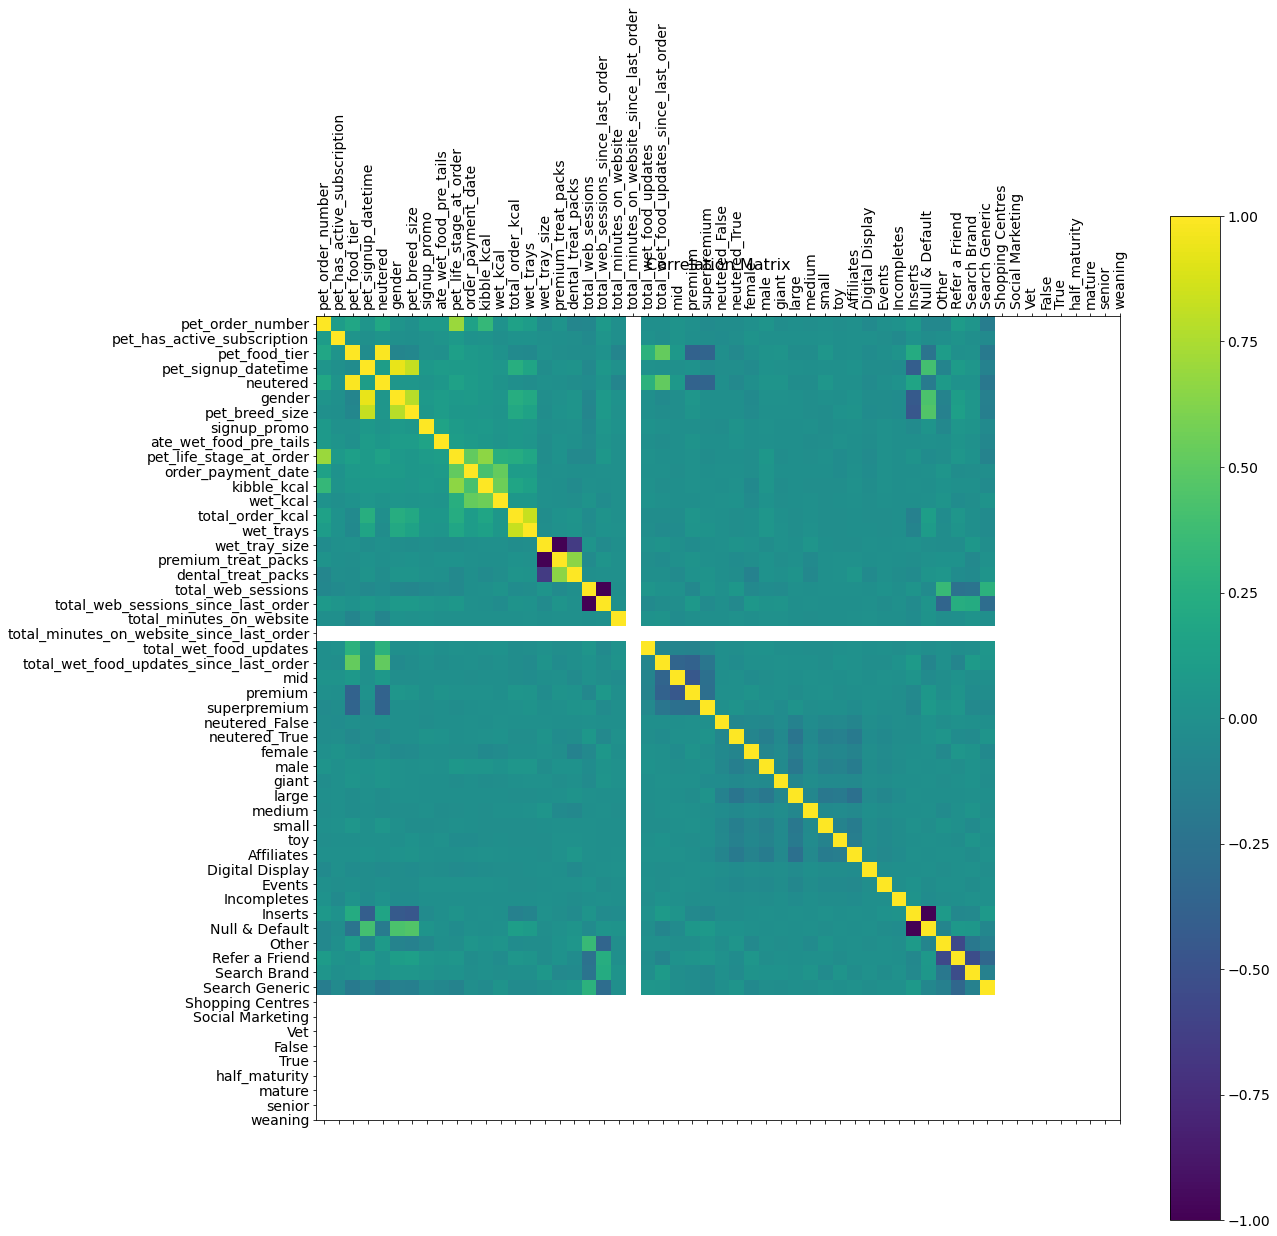

In [108]:
#Correlation verification
f = plt.figure(figsize=(18, 18))
plt.matshow(df.corr(), fignum=f.number) # part that shows correlation ie feeds the correclationtot he graph plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig('Correlation Matrix.png')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49042 entries, 0 to 49041
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   pet_order_number                           49042 non-null  int64  
 1   pet_has_active_subscription                49042 non-null  bool   
 2   pet_food_tier                              49042 non-null  object 
 3   pet_signup_datetime                        49042 non-null  object 
 4   neutered                                   49042 non-null  object 
 5   gender                                     49042 non-null  object 
 6   pet_breed_size                             49042 non-null  object 
 7   signup_promo                               49042 non-null  object 
 8   ate_wet_food_pre_tails                     49042 non-null  object 
 9   pet_life_stage_at_order                    49042 non-null  object 
 10  order_payment_date    

In [110]:
#Datatypes of variables
print(df.dtypes)
print(df[:5])
pd.set_option('display.max_columns', None)
# df.head(5)

pet_order_number                               int64
pet_has_active_subscription                     bool
pet_food_tier                                 object
pet_signup_datetime                           object
neutered                                      object
gender                                        object
pet_breed_size                                object
signup_promo                                  object
ate_wet_food_pre_tails                        object
pet_life_stage_at_order                       object
order_payment_date                            object
kibble_kcal                                  float64
wet_kcal                                     float64
total_order_kcal                             float64
wet_trays                                      int64
wet_tray_size                                  int64
premium_treat_packs                            int64
dental_treat_packs                             int64
total_web_sessions                            

# **Feature removal for preparing data for Scaler and PCA Analysis**

In [111]:
# Deleted because are non numeric and will prevent Scaler and PCA analysis being run

#pet_has_active_subscription - not encoded
#pet_food_tier
#pet_signup_datetime - delete
#neutered
#gender
#pet_breed_size
#signup_promo
#ate_wet_food_pre_tails 
#pet_life_stage_at_order
#order_payment_date - delete

del df['pet_has_active_subscription']
del df['pet_food_tier']
del df['pet_signup_datetime']
del df['neutered']
del df['gender']
del df['pet_breed_size']
del df['signup_promo']
del df['ate_wet_food_pre_tails']
del df['pet_life_stage_at_order']
del df['order_payment_date']


# **Check all features are now numeric before running Scaler**

In [112]:
df.head(5)

pet_order_number  kibble_kcal  wet_kcal  total_order_kcal  wet_trays  \
0                 2    36876.724   1234.65         38111.374         11   
1                 1    21419.305      0.00         21419.305          0   
2                 8    18352.836   6624.00         24976.836         60   
3                 4    36617.214   2901.90         39519.114         26   
4                 9    18340.300   6624.00         24964.300         60   

   wet_tray_size  premium_treat_packs  dental_treat_packs  total_web_sessions  \
0            150                    0                   0                   6   
1              0                    0                   0                   2   
2            150                    0                   0                  18   
3            150                    0                   0                  13   
4            150                    0                   0                  19   

   total_web_sessions_since_last_order  total_minutes_on_website  \
0                                    4                       101   
1                                    1                        69   
2                                    0                       184   
3                                    6                       130   
4                                    1                       184   

   total_minutes_on_website_since_last_order  total_wet_food_updates  \
0                                         32                       0   
1                                          3                       0   
2                                          0                       0   
3                                         15                       0   
4                                          0                       0   

   total_wet_food_updates_since_last_order  mid  premium  superpremium  \
0                                        0  0.0      1.0           1.0   
1                                        0  0.0      1.0           1.0   
2                                        0  0.0      1.0           1.0   
3                                        0  0.0      1.0           1.0   
4                                        0  0.0      1.0           1.0   

   neutered_False  neutered_True  female  male  giant  large  medium  small  \
0             0.0            1.0     1.0   1.0    0.0    1.0     0.0    0.0   
1             0.0            1.0     1.0   1.0    0.0    1.0     0.0    0.0   
2             0.0            1.0     1.0   1.0    0.0    1.0     0.0    0.0   
3             0.0            1.0     1.0   1.0    0.0    1.0     0.0    0.0   
4             0.0            1.0     1.0   1.0    0.0    1.0     0.0    0.0   

   toy  Affiliates  Digital Display  Events  Incompletes  Inserts  \
0  0.0         0.0              0.0     0.0          0.0      0.0   
1  0.0         0.0              0.0     0.0          0.0      0.0   
2  0.0         0.0              0.0     0.0          0.0      0.0   
3  0.0         0.0              0.0     0.0          0.0      0.0   
4  0.0         0.0              0.0     0.0          0.0      0.0   

   Null & Default  Other  Refer a Friend  Search Brand  Search Generic  \
0             1.0    0.0             0.0           0.0             0.0   
1             1.0    0.0             0.0           0.0             0.0   
2             1.0    0.0             0.0           0.0             0.0   
3             1.0    0.0             0.0           0.0             0.0   
4             1.0    0.0             0.0           0.0             0.0   

   Shopping Centres  Social Marketing  Vet  False  True  half_maturity  \
0               0.0               0.0  0.0    0.0   1.0            0.0   
1               0.0               0.0  0.0    0.0   1.0            0.0   
2               0.0               0.0  0.0    0.0   1.0            0.0   
3               0.0               0.0  0.0    0.0   1.0            0.0   
4               0.0               0.0  0.0    0.0   1.0            0.0   

# **Outlier removal**

#Further Pre-Processing

1.   Plots to check for outliers



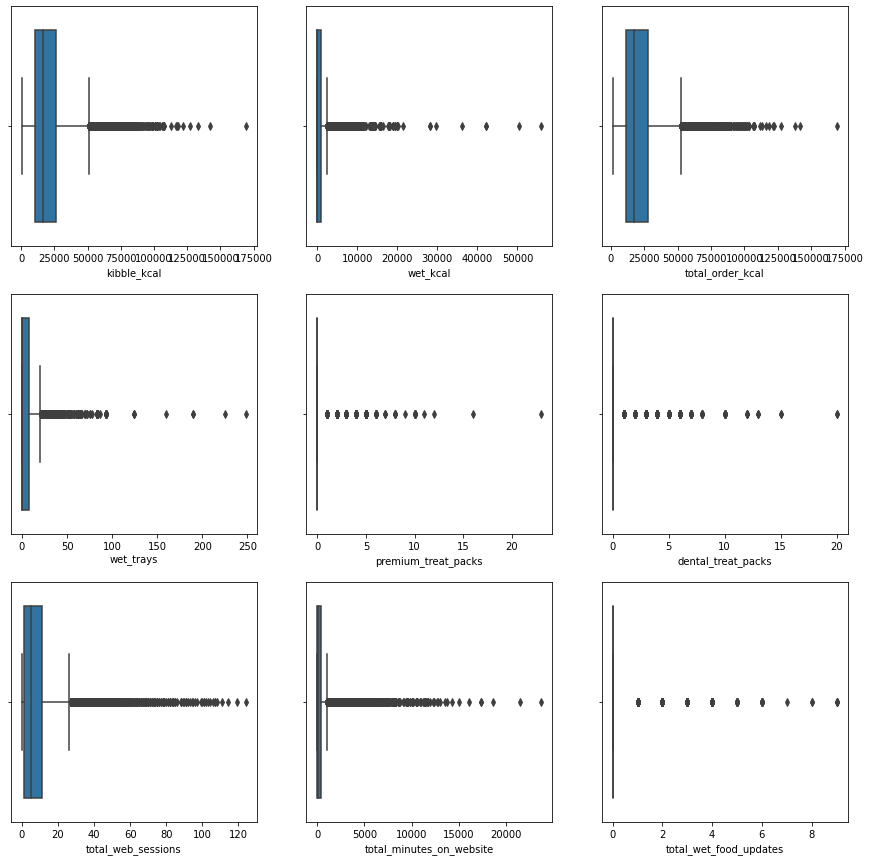

In [113]:
#Check if there any outliers for the numeric feature columns

plt.subplots(3,3,figsize=(15,15))

plt.subplot(3, 3, 1)
sns.boxplot(x=df['kibble_kcal'])
plt.subplot(3, 3, 2)
sns.boxplot(x=df['wet_kcal'])
plt.subplot(3, 3, 3)
sns.boxplot(x=df['total_order_kcal'])
plt.subplot(3, 3, 4)
sns.boxplot(x=df['wet_trays'])
plt.subplot(3, 3, 5)
sns.boxplot(x=df['premium_treat_packs'])
plt.subplot(3, 3, 6)
sns.boxplot(x=df['dental_treat_packs'])
plt.subplot(3, 3, 7)
sns.boxplot(x=df['total_web_sessions'])
plt.subplot(3, 3, 8)
sns.boxplot(x=df['total_minutes_on_website'])
plt.subplot(3, 3, 9)
sns.boxplot(x=df['total_wet_food_updates'])



In [114]:
#IQR range to remove outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print("*** -> Q1 ***")
print(Q1)
print("*** -> Q3 ***")
print(Q3)
print("*** -> IQR ***")
print(IQR)
print()
df.head(10)

*** -> Q1 ***
pet_order_number                                 1.000
kibble_kcal                                  10127.275
wet_kcal                                         0.000
total_order_kcal                             11099.017
wet_trays                                        0.000
wet_tray_size                                    0.000
premium_treat_packs                              0.000
dental_treat_packs                               0.000
total_web_sessions                               1.000
total_web_sessions_since_last_order              0.000
total_minutes_on_website                        18.000
total_minutes_on_website_since_last_order        0.000
total_wet_food_updates                           0.000
total_wet_food_updates_since_last_order          0.000
mid                                              0.000
premium                                          1.000
superpremium                                     0.000
neutered_False                                   0.

pet_order_number  kibble_kcal  wet_kcal  total_order_kcal  wet_trays  \
0                 2    36876.724   1234.65         38111.374         11   
1                 1    21419.305      0.00         21419.305          0   
2                 8    18352.836   6624.00         24976.836         60   
3                 4    36617.214   2901.90         39519.114         26   
4                 9    18340.300   6624.00         24964.300         60   
5                 6    14435.990      0.00         14435.990          0   
6                 3     9982.410      0.00          9982.410          0   
7                 9    14364.790      0.00         14725.590          0   
8                 1    10012.050      0.00         10012.050          0   
9                 7    14348.890      0.00         14348.890          0   

   wet_tray_size  premium_treat_packs  dental_treat_packs  total_web_sessions  \
0            150                    0                   0                   6   
1              0                    0                   0                   2   
2            150                    0                   0                  18   
3            150                    0                   0                  13   
4            150                    0                   0                  19   
5              0                    0                   0                  15   
6              0                    0                   0                   7   
7              0                    0                   0                  32   
8              0                    0                   0                   1   
9              0                    0                   0                  20   

   total_web_sessions_since_last_order  total_minutes_on_website  \
0                                    4                       101   
1                                    1                        69   
2                                    0                       184   
3                                    6                       130   
4                                    1                       184   
5                                    2                       118   
6                                    5                        36   
7                                    6                       134   
8                                    0                        32   
9                                    5                       127   

   total_minutes_on_website_since_last_order  total_wet_food_updates  \
0                                         32                       0   
1                                          3                       0   
2                                          0                       0   
3                                         15                       0   
4                                          0                       0   
5                                          1                       0   
6                                          1                       0   
7                                          4                       0   
8                                          0                       0   
9                                          9                       0   

   total_wet_food_updates_since_last_order  mid  premium  superpremium  \
0                                        0  0.0      1.0           1.0   
1                                        0  0.0      1.0           1.0   
2                                        0  0.0      1.0           1.0   
3                                        0  0.0      1.0           1.0   
4                                        0  0.0      1.0           1.0   
5                                        0  0.0      1.0           0.0   
6                                        0  0.0      1.0           0.0   
7                                        0  0.0      1.0           0.0   
8                                        0  0.0      1.0           0.0   
9  

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49042 entries, 0 to 49041
Data columns (total 45 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   pet_order_number                           49042 non-null  int64  
 1   kibble_kcal                                49042 non-null  float64
 2   wet_kcal                                   49042 non-null  float64
 3   total_order_kcal                           49042 non-null  float64
 4   wet_trays                                  49042 non-null  int64  
 5   wet_tray_size                              49042 non-null  int64  
 6   premium_treat_packs                        49042 non-null  int64  
 7   dental_treat_packs                         49042 non-null  int64  
 8   total_web_sessions                         49042 non-null  int64  
 9   total_web_sessions_since_last_order        49042 non-null  int64  
 10  total_minutes_on_websi

# **Do NOT -> NOT Run - IQR Outlier removal Method did not work -> see below for Flooring and Capping**

In [ ]:
### DO NOT RUN AS REMOVES ALL SAMPLES AND THEN SCALER DOES NOT RUN
### DO NOT RUN AS REMOVES ALL SAMPLES AND THEN SCALER DOES NOT RUN
### DO NOT RUN AS REMOVES ALL SAMPLES AND THEN SCALER DOES NOT RUN - df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] # hair cutting the data to remove outliers - may still leave additional/rermaining outliers so will need to use 'Flooring and Capping' methods' ***
# df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)] # hair cutting the data to remove outliers - may still leave additional/rermaining outliers so will need to use 'Flooring and Capping' methods' ***
print("Hair cutted df\n")

#df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

#for col in df.columns:
#  if df[col].sum != 0:
#    print(df[~((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR))).any(axis=1)])

df = df + 0.001
print(df)

# hair cutting the data to remove outliers - may still leave additional/rermaining outliers so will need to use 'Flooring and Capping' methods' ***
df_exp = (df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]) # hair cutting the data to remove outliers - may still leave additional/rermaining outliers so will need to use 'Flooring and Capping' methods' ***

#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3-Q1

#df['kibble_kcal'] = ([~((df['kibble_kcal'] < (df['kibble_kcal'].quantile(0.25) - 1.5 * df['kibble_kcal'].quantile(0.75) - df['kibble_kcal'].quantile(0.25)))
# | (df['kibble_kcal'] > (df['kibble_kcal'].quantile(0.75) + 1.5 * df['kibble_kcal'].quantile(0.75) - df['kibble_kcal'].quantile(0.25)))).any(axis=1)]) 

# hair cutting the data to remove outliers - may still leave additional/rermaining outliers so will need to use 'Flooring and Capping' methods' ***

#print(df['kibble_kcal'])
#sns.boxplot(x=df['kibble_kcal'])

print(df_exp)
print()
df_exp.describe()
print()
df_exp.info()


# **Flooring and Capping Outlier Removal**

In [116]:
# Flooring and Capping to remove the still remaining Outliers
import numpy as np

for col in df.columns:
    percentiles = df[col].quantile([0.10, 0.90]).values
    df[col] = np.clip(df[col], percentiles[0], percentiles[1])

print(df)

       pet_order_number  kibble_kcal  wet_kcal  total_order_kcal  wet_trays  \
0                     2   36876.7240   1234.65        38111.3740         11   
1                     1   21419.3050      0.00        21419.3050          0   
2                     7   18352.8360   3476.40        24976.8360         21   
3                     4   36617.2140   2901.90        39323.3553         21   
4                     7   18340.3000   3476.40        24964.3000         21   
...                 ...          ...       ...               ...        ...   
49037                 1    8842.6700      0.00         8842.6700          0   
49038                 1   13508.9650      0.00        13508.9650          0   
49039                 1   20192.1300      0.00        20192.1300          0   
49040                 1    6055.5188   1029.60         6810.4713          9   
49041                 1   38185.0922      0.00        39323.3553          0   

       wet_tray_size  premium_treat_packs  dental_t

# **Verifying with Plots that Outlier Removal worked**

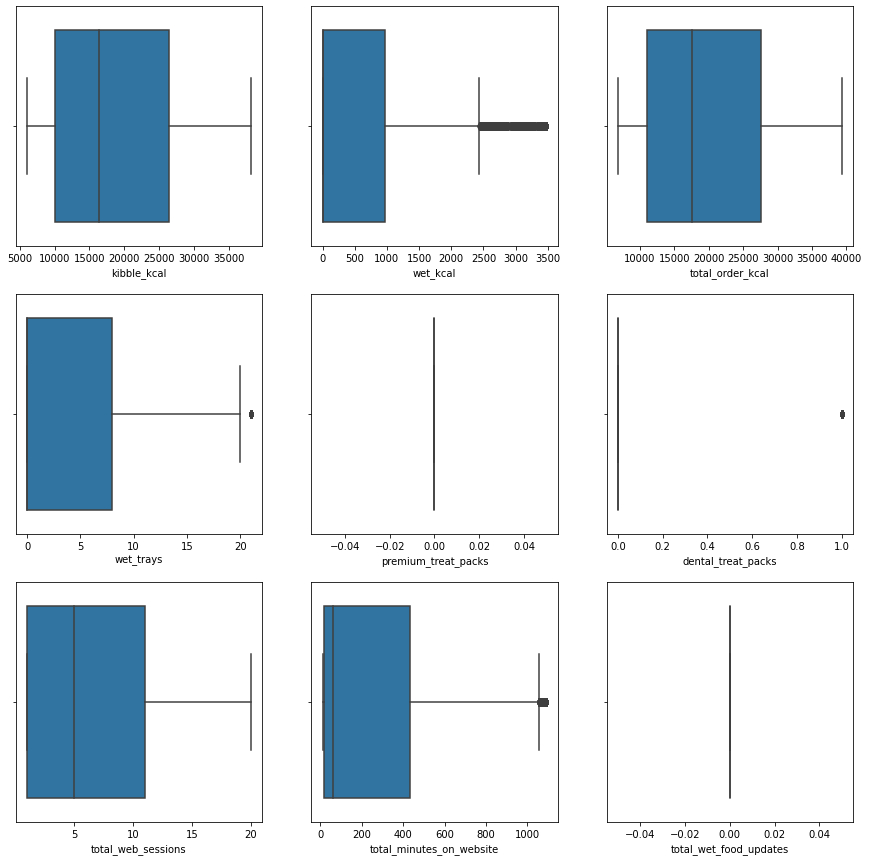

In [117]:
#2nd i.e. post Flooring and Capping Verification that the outliers are gone and visualising for the numeric features

plt.subplots(3,3,figsize=(15,15))

# 1st Block of plots
plt.subplot(3, 3, 1)
sns.boxplot(x=df['kibble_kcal'])
plt.subplot(3, 3, 2)
sns.boxplot(x=df['wet_kcal'])
plt.subplot(3, 3, 3)
sns.boxplot(x=df['total_order_kcal'])
plt.subplot(3, 3, 4)
sns.boxplot(x=df['wet_trays'])
plt.subplot(3, 3, 5)
sns.boxplot(x=df['premium_treat_packs'])
plt.subplot(3, 3, 6)
sns.boxplot(x=df['dental_treat_packs'])
plt.subplot(3, 3, 7)
sns.boxplot(x=df['total_web_sessions'])
plt.subplot(3, 3, 8)
sns.boxplot(x=df['total_minutes_on_website'])
plt.subplot(3, 3, 9)
sns.boxplot(x=df['total_wet_food_updates'])



*** Wet_kcal - with Outliers - untransformed ***


Text(0.5, 0, 'wet_kcal - with Outliers removed by exponential transformation')

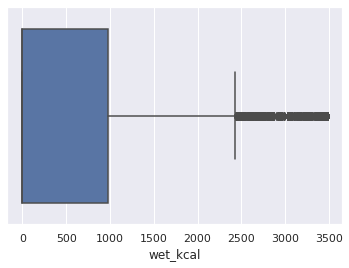

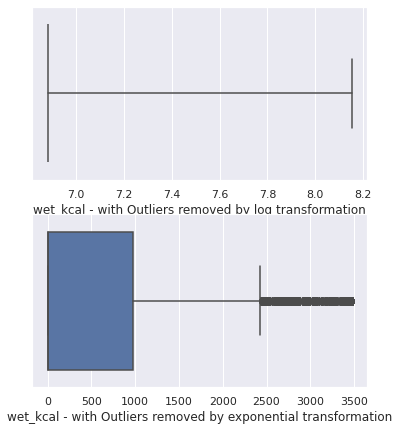

In [149]:
print('*** Wet_kcal - with Outliers - untransformed ***')
sns.boxplot(x=df['wet_kcal'])

#df['wet_kcal'] = np.log(df['wet_kcal'])

#print('wet_kcal - with Outliers removed by log transformation')
#sns.boxplot(x=df['wet_kcal'])

#df['wet_kcal'] = np.exp(df['wet_kcal'])

#print('wet_kcal - with Outliers removed by exponential transformation')
#sns.boxplot(x=df['wet_kcal'])

plt.subplots(1,1,figsize=(6,7))

# 1st Block of plots
plt.subplot(2, 1, 1)
df['wet_kcal'] = np.log(df['wet_kcal'])
sns.boxplot(x=df['wet_kcal'])
plt.xlabel('wet_kcal - with Outliers removed by log transformation')
# 2nd Block of plots
#plt.subplot(2, 1, 2)
#df['wet_kcal'] = np.exp(df['wet_kcal'])
#sns.boxplot(x=df['wet_kcal'])
#plt.xlabel('wet_kcal - with Outliers removed by exponential transformation')
#df['wet_kcal'].dropna()
#df['wet_kcal'] = df['wet_kcal'] + 0.000001

# **Standardize original numeric features into normalised features**

1.   Because the clustering algorithm k means use distance-based measurements to determine the similarity between data points
2.   We need to standardize the data
3.   To have a mean of zero
4.   And a standard deviation of one 




In [150]:
#Standardization - normalising the dataframes numerical features
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
print(df_std)

[[-0.58527405  1.71055336  0.44732202 ...  0.82666989 -0.43521947
   0.        ]
 [-1.0744104   0.23869278 -0.54639255 ...  0.82666989 -0.43521947
   0.        ]
 [ 1.86040769 -0.05329742  2.25160633 ...  0.82666989 -0.43521947
   0.        ]
 ...
 [-1.0744104   0.12184076 -0.54639255 ...  0.82666989 -0.43521947
   0.        ]
 [-1.0744104  -1.22425206  0.28228644 ...  0.82666989 -0.43521947
   0.        ]
 [-1.0744104   1.83513662 -0.54639255 ... -1.2096727  -0.43521947
   0.        ]]


# **Print 1st line/row of normalised / standardized values**

In [151]:
print(df_std[:1,:])
pd.set_option('display.max_columns', None)


[[-0.58527405  1.71055336  0.44732202  1.71243075  0.86874914  0.95377262
   0.         -0.34461694 -0.14078102  1.2686224  -0.46775958 -0.136494
   0.          0.         -0.55403088  0.55403088  0.84788103 -0.88459189
   0.88459189  1.09363685  0.          0.          1.87129476 -0.65288701
  -0.6878451  -0.39544685  0.         -0.38615624  0.         -0.34617014
   0.          1.751239    0.         -0.34797719  0.         -0.45902541
   0.          0.          0.         -1.32576292  1.32576292 -0.46477721
   0.82666989 -0.43521947  0.        ]]


# Dimensionality reduction using PCA

1.   Fit the standardized data of the features to the PCA model
2.   Reducing the data to one dimension
3.   Through reducing the data to one dimension therefore incresing its    information content


In [152]:
#Fitting the standardized data using PCA
pca = PCA()
pca.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# **Calculating the explained variance ratio**

1.   Deciding how many features we have to keep based on the Cumulative Variance plot
2.   Checking how much Variance is explained by each of the variables



In [153]:
#Deciding how many features we have to keep based on the Cumulative Variance plot
#Checking how much Variance is explained by each of the variables
pca.explained_variance_ratio_

array([1.25640467e-01, 1.05485763e-01, 8.28626221e-02, 8.03358695e-02,
       7.51651897e-02, 5.18620659e-02, 4.49208301e-02, 4.23243897e-02,
       4.06720885e-02, 3.82416149e-02, 3.76170182e-02, 3.64580623e-02,
       3.58739895e-02, 3.54495058e-02, 3.24456315e-02, 3.02414451e-02,
       2.78946309e-02, 1.80906639e-02, 1.42900980e-02, 1.28607739e-02,
       9.92565120e-03, 8.79518291e-03, 4.20468801e-03, 3.70378826e-03,
       2.96827544e-03, 8.52861083e-04, 6.86347295e-04, 1.30486307e-04,
       3.80116491e-33, 1.00018384e-33, 6.20855493e-34, 6.20855493e-34,
       6.20855493e-34, 6.20855493e-34, 6.20855493e-34, 6.20855493e-34,
       6.20855493e-34, 6.20855493e-34, 6.20855493e-34, 6.20855493e-34,
       6.20855493e-34, 6.20855493e-34, 6.20855493e-34, 6.20855493e-34,
       2.60665269e-34])

# **Visualising the Variance**

1.   Graphing cumulative variance by the number of components



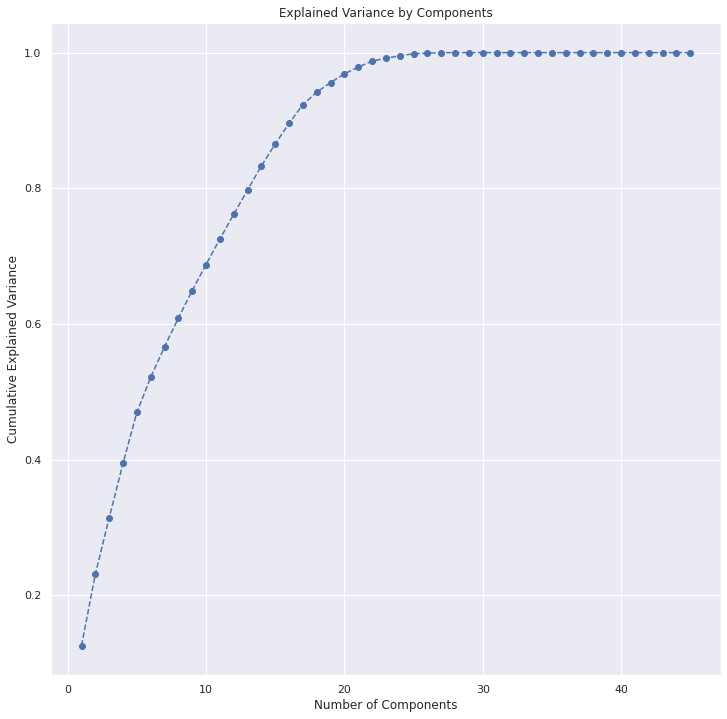

In [154]:
#Visualising the variance ratio
plt.figure(figsize = (12,12))
plt.plot(range(1,46), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.savefig('Cumulative Explained Variance.png')

# **In the Cumulative Variance by Component plot above**

1.   We choose the point of (0.80) 80% of the Variance on the vertical axis
2.   This corresponds to 22 components on the horizontal axis
3.   Now we run PCA analysis with the number of Components set at 22 components
from the intersection of the 0.80 vertical axis point and the Cumulative Variance line






In [155]:
#In the Cumulative Variance by Component plot above
#we choose the point of (0.80) 80% of the Variance on the vertical axis
#This corresponds to 15 components on the horizontal axis
#Now we run PCA analysis with the number of Components set at 15 components
#from the intersection of the 0.80 vertical axis point and the Cumulative Variance line
pca = PCA(n_components = 15)

# **Fitting the PCA model with the selected number of 22 Components**

In [156]:
#Fitting the PCA model with the selected number of 22 Components
pca.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# **Creating the PCA scores**

1.   From the standardized feature values
2.   Which are refitted to the PCA model based on the number of components covering 0.80 (80%) of the cumulative variance



In [157]:
#Taking the calculated resulting Components PCA Scores from our dataset # 
pca_scores = pca.transform(df_std)
pca_scores

array([[ 1.50228855,  2.07994581, -0.22642324, ..., -0.01570825,
         0.65216264, -0.83796578],
       [ 0.35775499, -0.62740173, -0.364668  , ..., -0.26980673,
         0.37070852, -0.9425987 ],
       [ 3.30991738,  2.23764959, -0.43956377, ..., -0.50137819,
        -1.62578819, -1.30342741],
       ...,
       [-0.79690468, -1.43410642,  0.10881747, ..., -0.04734872,
         0.4903099 ,  0.96004698],
       [ 0.52527485, -2.65605786,  2.64135574, ...,  0.47935575,
         0.29203699, -1.07862971],
       [-2.83775197, -0.39935367,  2.8274957 , ..., -1.94688915,
         1.70856185, -0.5523765 ]])

# **KMeans Clustering on newly obtained from above PCA scores to segment our data and label it**

1.   Determining the number of Clusters
2.   By creating the data to plot in the WCSS graph - (WCSS) stands for 'Within-cluster-Sum-of-the-squared-errors'
3.   Plotting the WCSS graph aka the 'Elbow' graph
4.   Selecting the number of Clusters based on the point where the graph's WCSS line reduces in slope to a near flat state i.e. the 'Elbow' point





In [158]:
#Determining how many number of Clusters we need to test in a K-Means algorithm using the Elbow Method
#Using PCA Score / pca_scores our new data
wcss = [] # (WCSS) stands for 'Within-cluster-Sum-of-the-squared-errors'

for i in range(1,6): # TRIAL AND ERROR - TRY WITH 4,5,6
    # 1st analysis parameter settings list
    # kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', max_iter=150, tol=1e-4, random_state=42)
    # 2nd analysis parameter settings list
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', n_init=20, max_iter=450, tol=1e-9, copy_x=True, algorithm='full')
    # KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
    KMeans()
    kmeans_pca.fit(pca_scores)
    wcss.append(kmeans_pca.inertia_)

# **Elbow chart of WCSS (within-cluster-sum-of-squared-errors)**

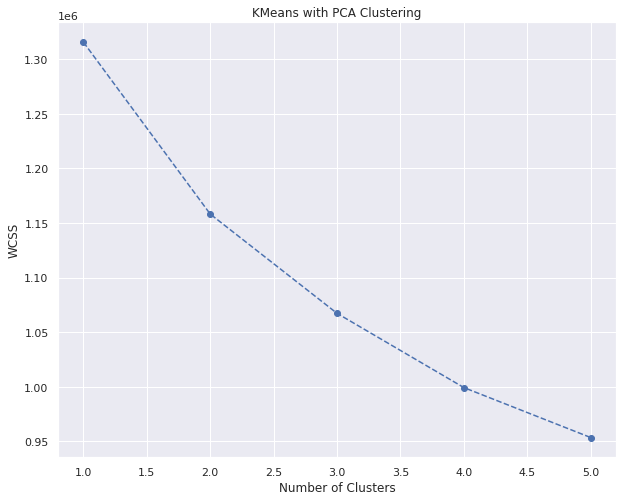

In [159]:
#Plotting the WCSS against the number of components on a graph
# Within Cluster Sum of Squares (WCSS), which measures the squared average distance of all the points within a Cluster to the cluster centroid. 
# To calculate WCSS, you first find the Euclidean distance (see figure below) between a given point and the Centroid to which it is assigned.
plt.figure(figsize = (10,8))
#plt.figure(figsize = (20,8))

plt.plot(range(1,6), wcss, marker = 'o', linestyle = '--') # needs to match previous cell's upper limit of the range of k clusters generated - TRIAL AND ERROR START WITH 4,5,6

#plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('KMeans with PCA Clustering')
plt.savefig('KMeans with PCA Clustering.png')

# **Recalculating K-means in PCA form for above determined number of clusters K**

In [160]:
#From the graph above we can see that after cluster 5 it is smoother this means that our k is 5
#Applying KMeans with number of clusters 10
kmeans_pca = KMeans(5)
kmeans_pca

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Fitting #

1.   The new PCA scores
2.   Found for the selected by 'Elbow' method number of clusters
3.   To the K means model



In [161]:
#Fitting the PCA SCores / pca_scores with the kmeans_pca model
kmeans_pca.fit(pca_scores)
labels = kmeans_pca.labels_
print(labels)

[0 2 0 ... 2 1 1]


# **Interpretation of Results**

1.   Building up the original table with PCA analysis scores
2.   Then appending the component values



In [162]:
#Interpretation of Clusters and PCA results
#Creating a data frame with original features and appending the clustering and PCA results to it
df_seg_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
# what is the significance of [-6: ] below - Sarath said it was a relative referece
df_seg_pca_kmeans.columns.values[-15: ] = ['Component 1','Component 2','Component 3','Component 4','Component 5','Component 6','Component 7','Component 8','Component 9','Component 10','Component 11','Component 12',
'Component 13','Component 14','Component 15']

#,'Component 16', 'Component 17', 'Component 18','Component 19','Component 20','Component 21','Component 22',]
#'Component 23','Component 24','Component 25','Component 26','Component 27','Component 28','Component 29','Component 30','Component 31','Component 32','Component 33','Component 34',
#'Component 35','Component 36','Component 37','Component 38', 'Component 39', 'Component 40','Component 41','Component 42','Component 43']

df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_

print(kmeans_pca.labels_)

[0 2 0 ... 2 1 1]


In [163]:
df_seg_pca_kmeans

pet_order_number  kibble_kcal  wet_kcal  total_order_kcal  wet_trays  \
0                     2   36876.7240   1234.65        38111.3740         11   
1                     1   21419.3050      0.00        21419.3050          0   
2                     7   18352.8360   3476.40        24976.8360         21   
3                     4   36617.2140   2901.90        39323.3553         21   
4                     7   18340.3000   3476.40        24964.3000         21   
...                 ...          ...       ...               ...        ...   
49037                 1    8842.6700      0.00         8842.6700          0   
49038                 1   13508.9650      0.00        13508.9650          0   
49039                 1   20192.1300      0.00        20192.1300          0   
49040                 1    6055.5188   1029.60         6810.4713          9   
49041                 1   38185.0922      0.00        39323.3553          0   

       wet_tray_size  premium_treat_packs  dental_treat_packs  \
0                150                    0                   0   
1                  0                    0                   0   
2                150                    0                   0   
3                150                    0                   0   
4                150                    0                   0   
...              ...                  ...                 ...   
49037              0                    0                   0   
49038              0                    0                   0   
49039              0                    0                   0   
49040            150                    0                   0   
49041              0                    0                   0   

       total_web_sessions  total_web_sessions_since_last_order  \
0                       6                                    4   
1                       2                                    1   
2                      18                                    0   
3                      13                                    5   
4                      19                                    1   
...                   ...                                  ...   
49037                   2                                    2   
49038                   1                                    0   
49039                   2                                    0   
49040                   1                                    0   
49041                   1                                    0   

       total_minutes_on_website  total_minutes_on_website_since_last_order  \
0                           101                                         32   
1                            69                                          3   
2                           184                                          0   
3                           130                                         15   
4                           184                                          0   
...                         ...                                        ...   
49037                        10                                          3   
49038                        24                                          0   
49039                        44                                          0   
49040                        10                                          0   
49041                        10                                          0   

       total_wet_food_updates  total_wet_food_updates_since_last_order  mid  \
0                           0                                        0  0.0   
1                           0                                        0  0.0   
2                           0                                        0  0.0   
3                           0                                        0  0.0   
4                           0                                        0  0.0   
...                       ...                                      ...  .

# **Interpretation of results**

1.   mean
2.   median
3.   standard deviation
4.   variance 



In [164]:
df_seg_pca_kmeans.groupby('Cluster').mean()

pet_order_number   kibble_kcal     wet_kcal  total_order_kcal  \
Cluster                                                                  
0                3.262677  16863.920554  2878.721009      20407.498744   
1                2.973574  18687.351736   129.066226      19056.782605   
2                3.169488  14917.632240    81.207067      15184.669736   
3                2.568245  13776.698915    79.934512      14063.968369   
4                4.199043  33751.421671    58.684145      34379.112334   

         wet_trays  wet_tray_size  premium_treat_packs  dental_treat_packs  \
Cluster                                                                      
0        17.788127     221.449533                  0.0            0.171173   
1         1.009177      13.251880                  0.0            0.079390   
2         0.701675      10.389316                  0.0            0.100589   
3         0.679858      10.272788                  0.0            0.079339   
4         0.401154       5.890293                  0.0            0.094736   

         total_web_sessions  total_web_sessions_since_last_order  \
Cluster                                                            
0                  7.679592                             1.990474   
1                  6.071429                             1.568443   
2                  6.366048                             1.486555   
3                  4.990203                             1.454903   
4                  9.960977                             2.310590   

         total_minutes_on_website  total_minutes_on_website_since_last_order  \
Cluster                                                                        
0                      315.419513                                  53.570769   
1                      236.833923                                  38.719925   
2                      231.463015                                  33.101222   
3                      201.858707                                  37.496974   
4                      408.121487                                  65.574917   

         total_wet_food_updates  total_wet_food_updates_since_last_order  \
Cluster                                                                    
0                           0.0                                      0.0   
1                           0.0                                      0.0   
2                           0.0                                      0.0   
3                           0.0                                      0.0   
4                           0.0                                      0.0   

              mid   premium  superpremium  neutered_False  neutered_True  \
Cluster                                                                    
0        0.201289  0.798711      0.629655        0.339555       0.660445   
1        1.000000  0.000000      0.000000        0.495467       0.504533   
2        0.000000  1.000000      0.732005        0.000000       1.000000   
3        0.000000  1.000000      0.789742        0.970608       0.029392   
4        0.046877  0.953123      0.697018        0.418947       0.581053   

           female  male  giant     large    medium     small       toy  \
Cluster                                                                  
0        0.478399   1.0    0.0  0.179255  0.292408  0.375349  0.134514   
1        0.455661   1.0    0.0  0.221252  0.303406  0.307718  0.142857   
2        0.455591   1.0    0.0  0.048438  0.295699  0.474876  0.175192   
3        0.459802   1.0    0.0  0.095284  0.342618  0.353472  0.192489   
4        0.419683   1.0    0.0  0.675298  0.250460  0.017425  0.000368   

         Affiliates  Digital Display  Events  Incompletes  Inserts  \
Cluster                                                              
0               0.0         0.127586     0.0     0.113442      0.0   
1               0.0         0.150155     0.0     0.090115      0.0   
2               0.0         0.098687    

In [165]:
df_seg_pca_kmeans.groupby('Cluster').median()

pet_order_number  kibble_kcal  wet_kcal  total_order_kcal  wet_trays  \
Cluster                                                                         
0                       3   14361.5400    3460.8       18126.07900         20   
1                       2   16406.0165       0.0       16556.29925          0   
2                       3   13939.0400       0.0       14374.60200          0   
3                       2   12459.9800       0.0       12650.06650          0   
4                       4   36671.6300       0.0       36946.36500          0   

         wet_tray_size  premium_treat_packs  dental_treat_packs  \
Cluster                                                           
0                  150                    0                   0   
1                    0                    0                   0   
2                    0                    0                   0   
3                    0                    0                   0   
4                    0                    0                   0   

         total_web_sessions  total_web_sessions_since_last_order  \
Cluster                                                            
0                         6                                    2   
1                         4                                    1   
2                         4                                    1   
3                         3                                    1   
4                         9                                    2   

         total_minutes_on_website  total_minutes_on_website_since_last_order  \
Cluster                                                                        
0                              89                                          4   
1                              43                                          1   
2                              44                                          1   
3                              33                                          0   
4                             222                                          5   

         total_wet_food_updates  total_wet_food_updates_since_last_order  mid  \
Cluster                                                                         
0                             0                                        0  0.0   
1                             0                                        0  1.0   
2                             0                                        0  0.0   
3                             0                                        0  0.0   
4                             0                                        0  0.0   

         premium  superpremium  neutered_False  neutered_True  female  male  \
Cluster                                                                       
0            1.0           1.0             0.0            1.0     0.0   1.0   
1            0.0           0.0             0.0            1.0     0.0   1.0   
2            1.0           1.0             0.0            1.0     0.0   1.0   
3            1.0           1.0             1.0            0.0     0.0   1.0   
4            1.0           1.0             0.0            1.0     0.0   1.0   

         giant  large  medium  small  toy  Affiliates  Digital Display  \
Cluster                                                                  
0          0.0    0.0     0.0    0.0  0.0         0.0              0.0   
1          0.0    0.0     0.0    0.0  0.0         0.0              0.0   
2          0.0    0.0     0.0    0.0  0.0         0.0              0.0   
3          0.0    0.0     0.0    0.0  0.0         0.0              0.0   
4          0.0    1.0     0.0    0.0  0.0         0.0              0.0   

         Events  Incompletes  Inserts  Null & Default  Other  Refer a Friend  \
Cluster                                                                        
0           0.0          0.0      0.0             0.0    0.0             0.0   
1           0.0          0.0      0.0             0.

In [166]:
df_seg_pca_kmeans.groupby('Cluster').std()

pet_order_number   kibble_kcal    wet_kcal  total_order_kcal  \
Cluster                                                                 
0                1.981945   9452.124239  781.006524       9789.083482   
1                1.955738  10264.356081  483.578317      10318.217286   
2                2.118816   6507.655893  328.967060       6409.264578   
3                1.766164   7048.210010  328.685356       6928.446542   
4                2.064056   5578.381808  365.686484       5887.235215   

         wet_trays  wet_tray_size  premium_treat_packs  dental_treat_packs  \
Cluster                                                                      
0         3.966049      74.915906                  0.0            0.376678   
1         3.661870      46.536888                  0.0            0.270361   
2         2.858742      40.016890                  0.0            0.300797   
3         2.791884      39.562722                  0.0            0.270280   
4         2.408401      34.675836                  0.0            0.292867   

         total_web_sessions  total_web_sessions_since_last_order  \
Cluster                                                            
0                  6.556889                             1.833002   
1                  5.991736                             1.731401   
2                  6.212283                             1.692422   
3                  5.175006                             1.694246   
4                  6.804313                             1.825705   

         total_minutes_on_website  total_minutes_on_website_since_last_order  \
Cluster                                                                        
0                      386.683710                                 100.128866   
1                      346.265906                                  87.965320   
2                      341.323632                                  81.491011   
3                      318.272326                                  87.320715   
4                      418.200119                                 109.660581   

         total_wet_food_updates  total_wet_food_updates_since_last_order  \
Cluster                                                                    
0                           0.0                                      0.0   
1                           0.0                                      0.0   
2                           0.0                                      0.0   
3                           0.0                                      0.0   
4                           0.0                                      0.0   

              mid   premium  superpremium  neutered_False  neutered_True  \
Cluster                                                                    
0        0.400983  0.400983      0.482920        0.473581       0.473581   
1        0.000000  0.000000      0.000000        0.500007       0.500007   
2        0.000000  0.000000      0.442935        0.000000       0.000000   
3        0.000000  0.000000      0.407512        0.168911       0.168911   
4        0.211388  0.211388      0.459576        0.493417       0.493417   

           female  male  giant     large    medium     small       toy  \
Cluster                                                                  
0        0.499557   0.0    0.0  0.383584  0.454891  0.484236  0.341220   
1        0.498058   0.0    0.0  0.415113  0.459754  0.461575  0.349946   
2        0.498046   0.0    0.0  0.214700  0.456377  0.499391  0.380149   
3        0.498405   0.0    0.0  0.293621  0.474608  0.478071  0.394274   
4        0.493537   0.0    0.0  0.468292  0.433305  0.130858  0.019185   

         Affiliates  Digital Display  Events  Incompletes  Inserts  \
Cluster                                                              
0               0.0         0.333644     0.0     0.317147      0.0   
1               0.0         0.357243     0.0     0.286362      0.0   
2               0.0         0.298255     0.0   

In [167]:
df_seg_pca_kmeans.groupby('Cluster').var()

pet_order_number   kibble_kcal       wet_kcal  total_order_kcal  \
Cluster                                                                    
0                3.928107  8.934265e+07  609971.190296      9.582616e+07   
1                3.824913  1.053570e+08  233847.989154      1.064656e+08   
2                4.489380  4.234959e+07  108219.326784      4.107867e+07   
3                3.119334  4.967726e+07  108034.063465      4.800337e+07   
4                4.260328  3.111834e+07  133726.604704      3.465954e+07   

         wet_trays  wet_tray_size  premium_treat_packs  dental_treat_packs  \
Cluster                                                                      
0        15.729547    5612.392973                  0.0            0.141886   
1        13.409293    2165.681988                  0.0            0.073095   
2         8.172403    1601.351498                  0.0            0.090479   
3         7.794617    1565.208961                  0.0            0.073051   
4         5.800396    1202.413589                  0.0            0.085771   

         total_web_sessions  total_web_sessions_since_last_order  \
Cluster                                                            
0                 42.992787                             3.359898   
1                 35.900902                             2.997748   
2                 38.592455                             2.864293   
3                 26.780692                             2.870469   
4                 46.298673                             3.333198   

         total_minutes_on_website  total_minutes_on_website_since_last_order  \
Cluster                                                                        
0                   149524.291659                               10025.789858   
1                   119900.077911                                7737.897553   
2                   116501.821454                                6640.784936   
3                   101297.273310                                7624.907268   
4                   174891.339436                               12025.442994   

         total_wet_food_updates  total_wet_food_updates_since_last_order  \
Cluster                                                                    
0                           0.0                                      0.0   
1                           0.0                                      0.0   
2                           0.0                                      0.0   
3                           0.0                                      0.0   
4                           0.0                                      0.0   

              mid   premium  superpremium  neutered_False  neutered_True  \
Cluster                                                                    
0        0.160787  0.160787      0.233212        0.224279       0.224279   
1        0.000000  0.000000      0.000000        0.250007       0.250007   
2        0.000000  0.000000      0.196191        0.000000       0.000000   
3        0.000000  0.000000      0.166066        0.028531       0.028531   
4        0.044685  0.044685      0.211210        0.243460       0.243460   

           female  male  giant     large    medium     small       toy  \
Cluster                                                                  
0        0.249557   0.0    0.0  0.147137  0.206926  0.234485  0.116431   
1        0.248062   0.0    0.0  0.172318  0.211374  0.213051  0.122463   
2        0.248050   0.0    0.0  0.046096  0.208280  0.249391  0.144513   
3        0.248408   0.0    0.0  0.086213  0.225253  0.228552  0.155452   
4        0.243579   0.0    0.0  0.219298  0.187753  0.017124  0.000368   

         Affiliates  Digital Display  Events  Incompletes  Inserts  \
Cluster                                                              
0               0.0         0.111318     0.0     0.100582      0.0   
1               0.0         0.127622     0.0     0.082003      0.0   
2               0.0       

# **Visualisation of results**

# **Graph Histograms for all Clusters and Features**

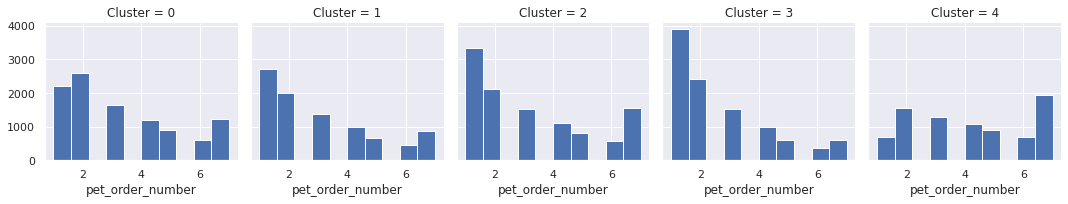

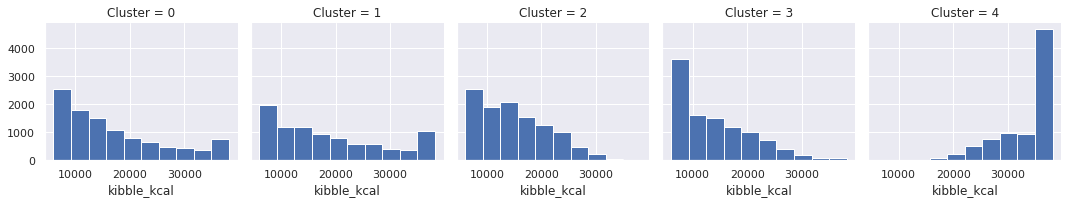

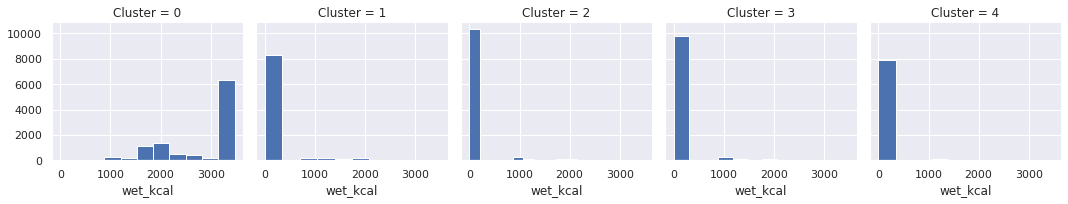

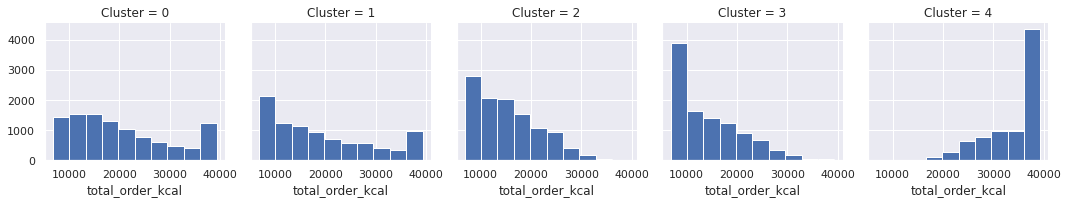

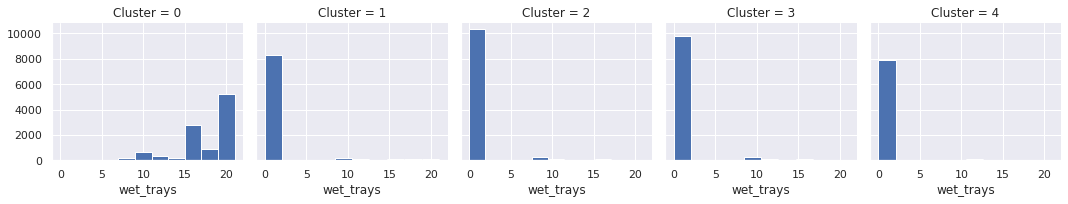

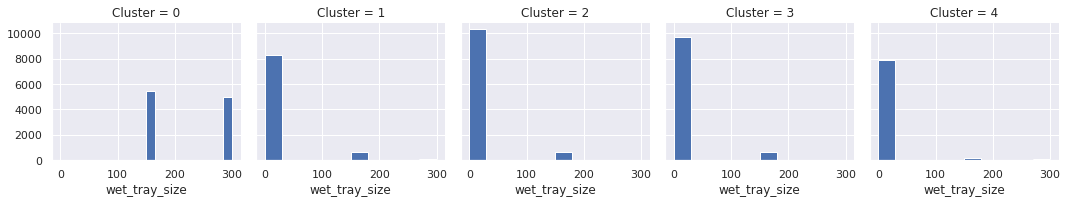

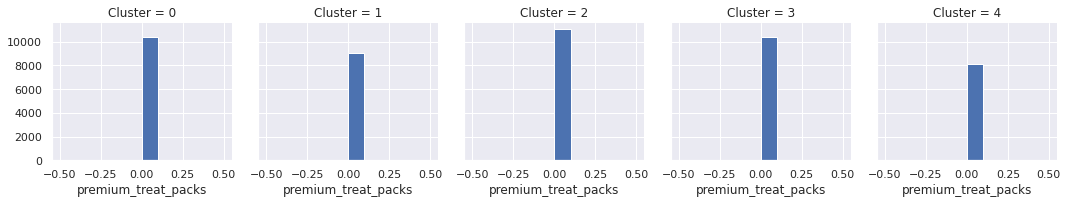

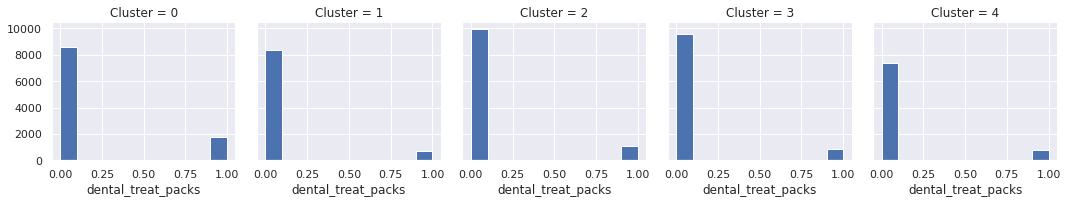

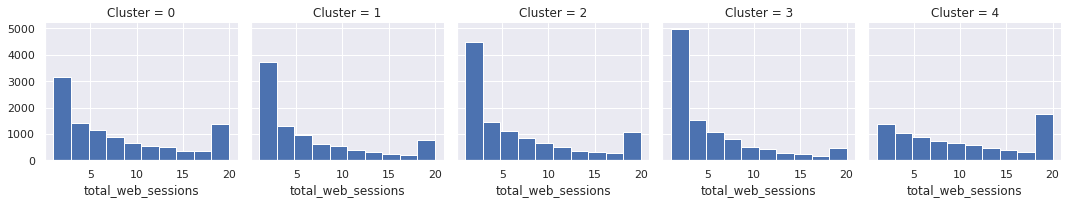

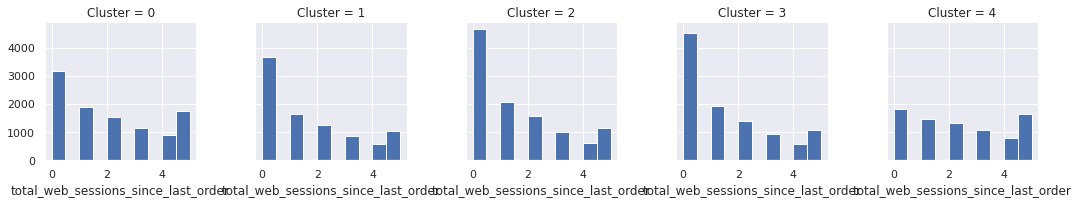

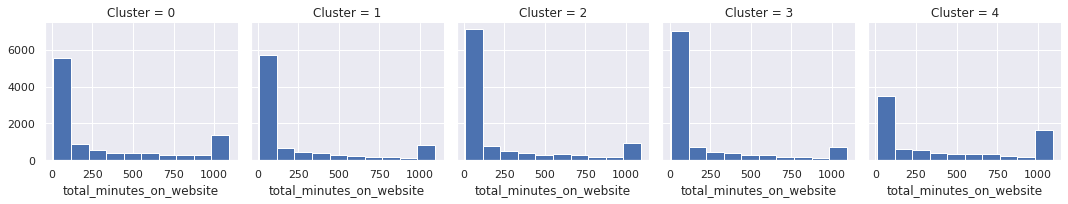

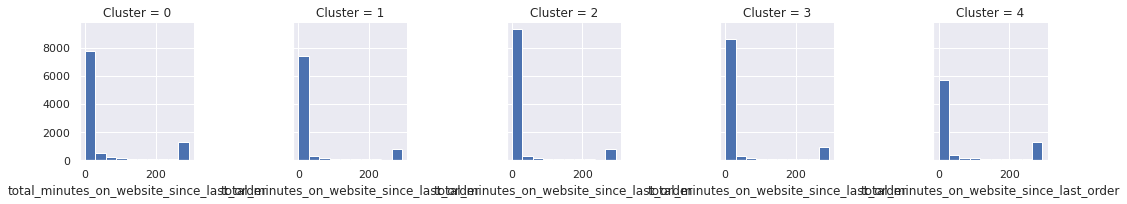

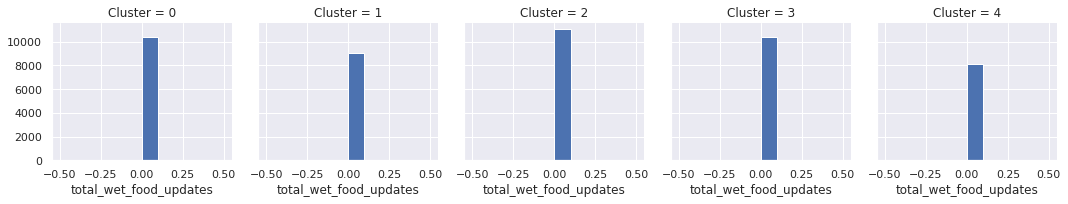

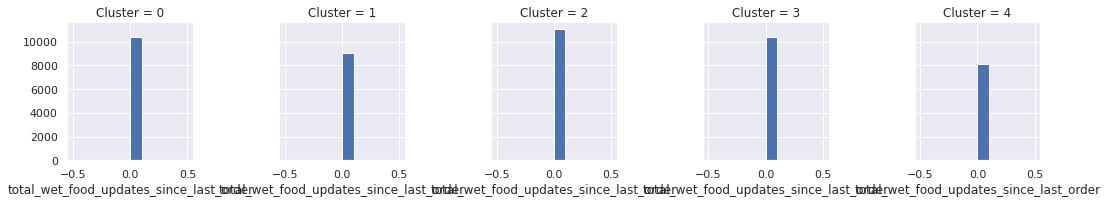

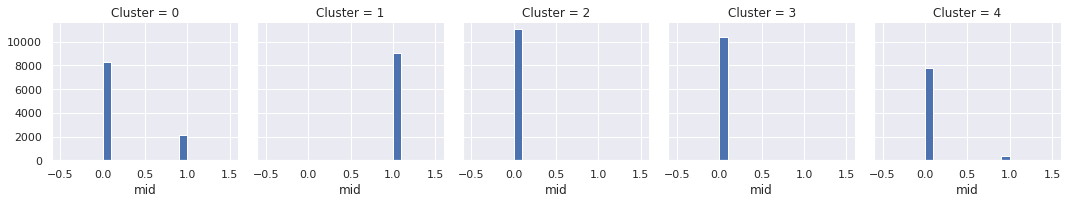

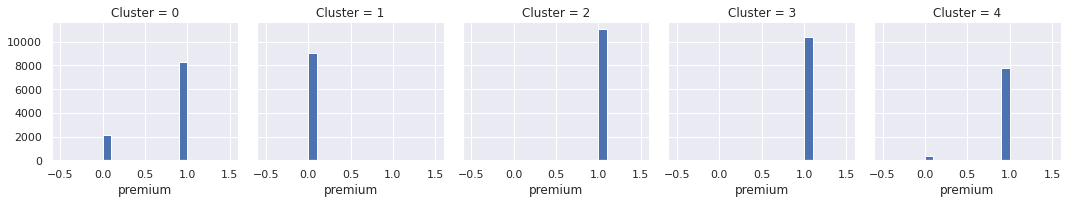

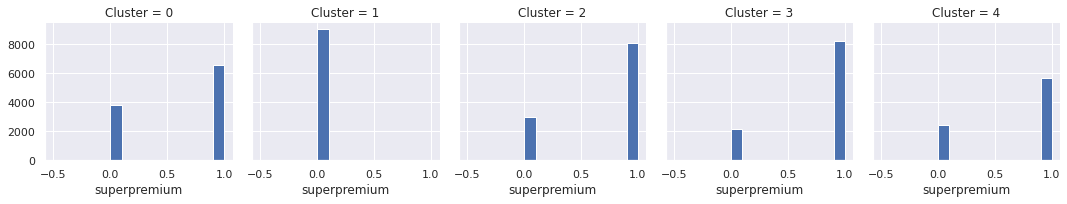

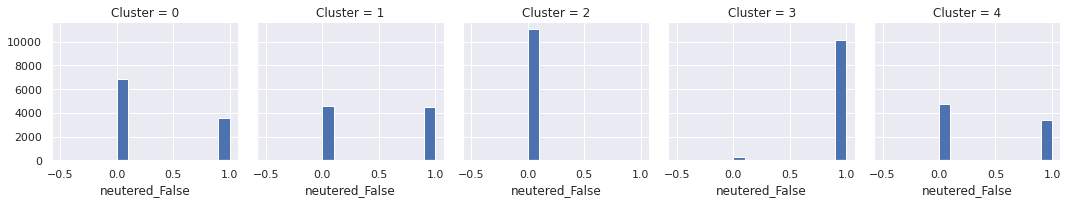

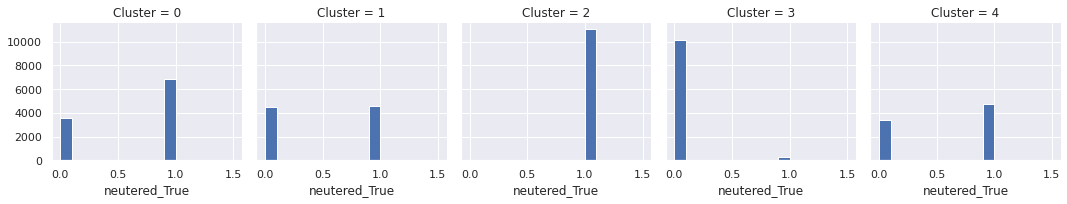

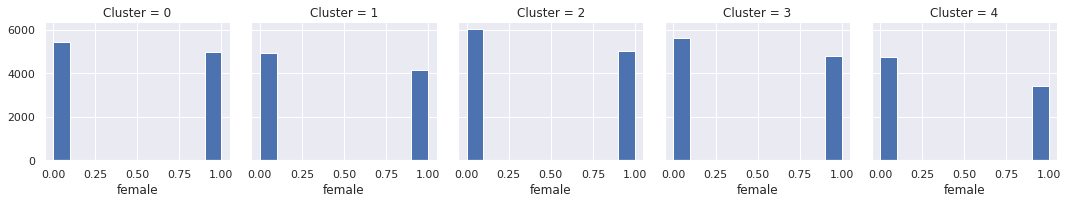

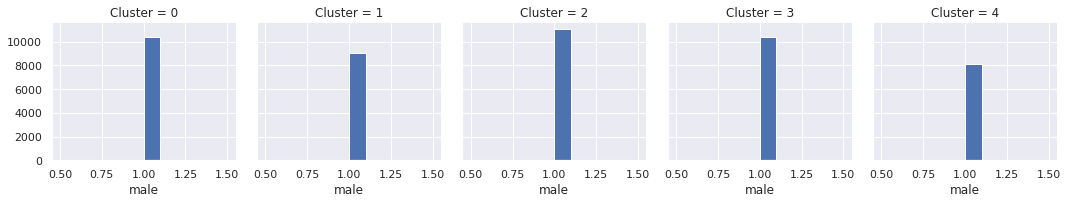

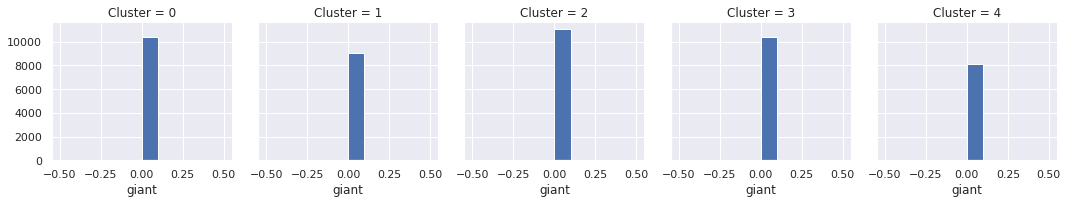

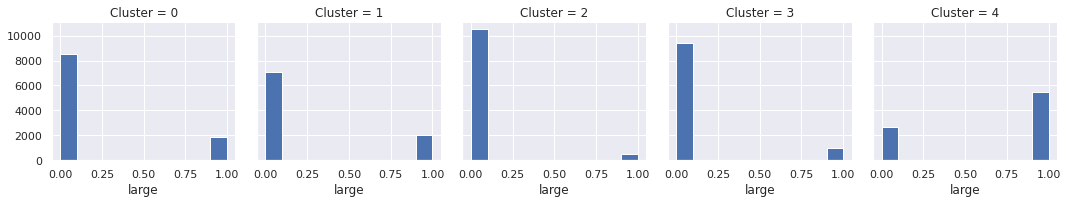

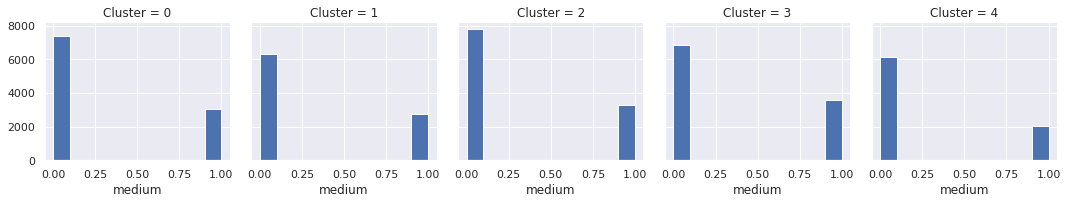

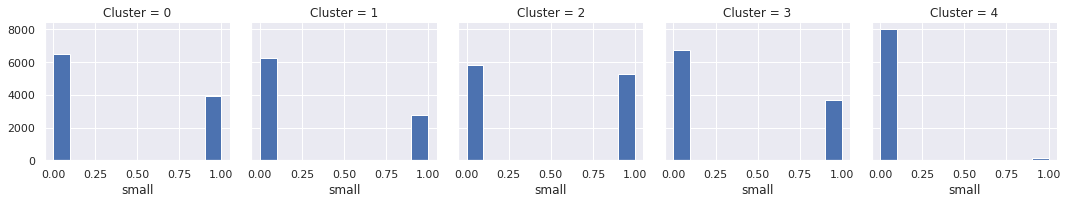

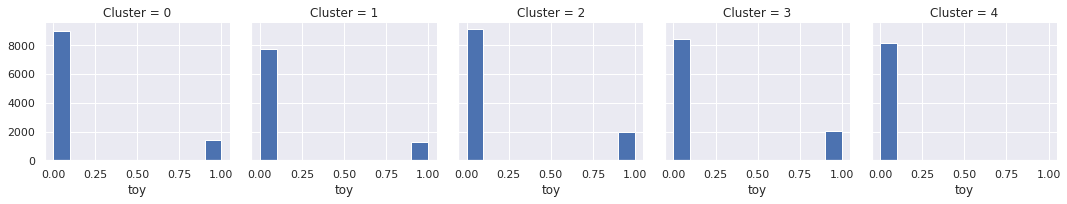

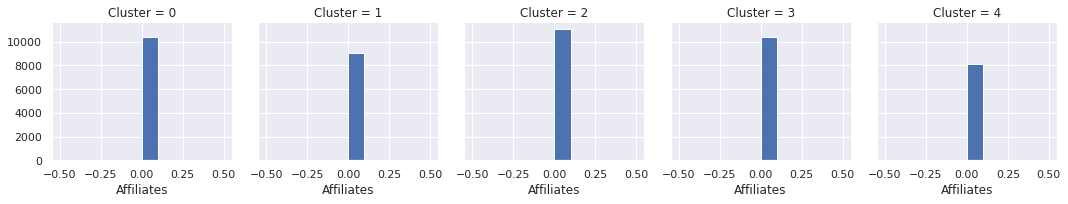

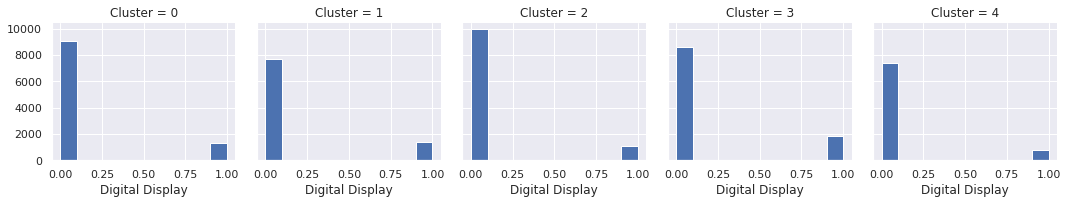

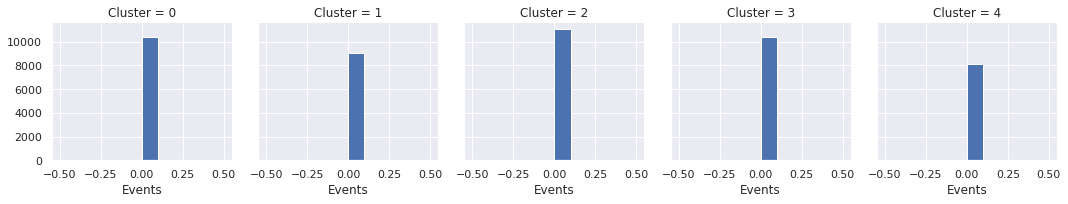

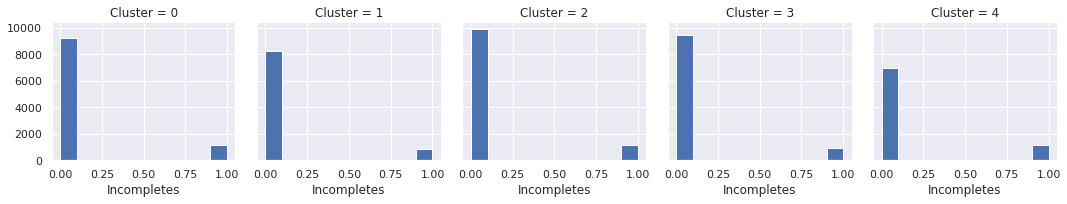

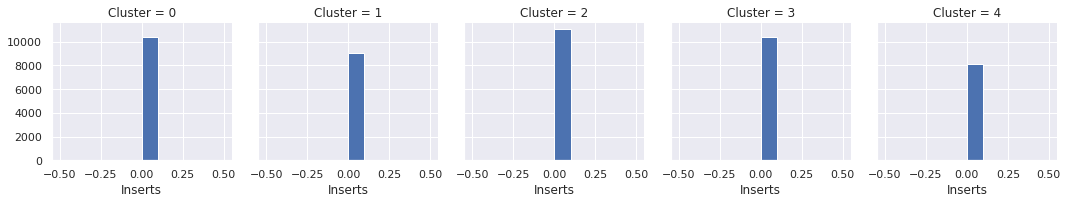

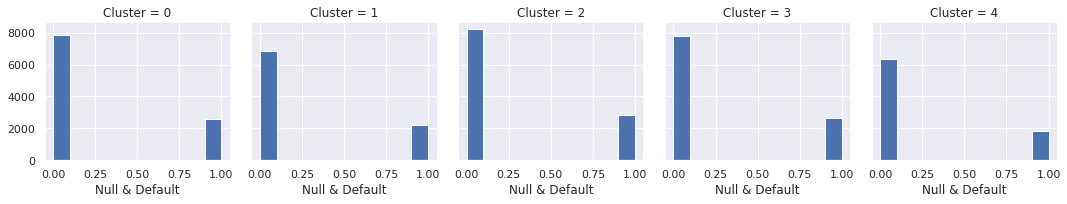

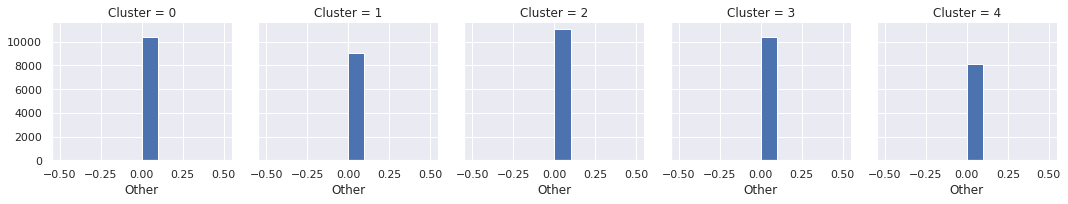

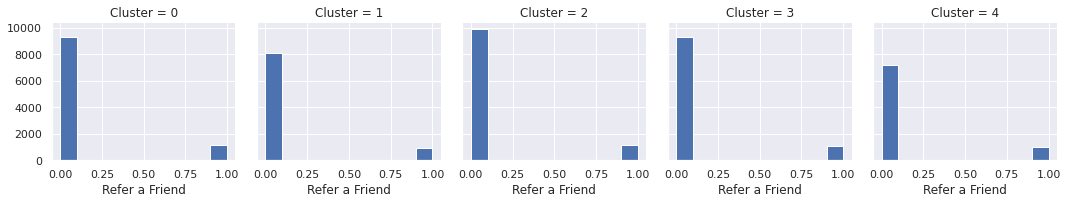

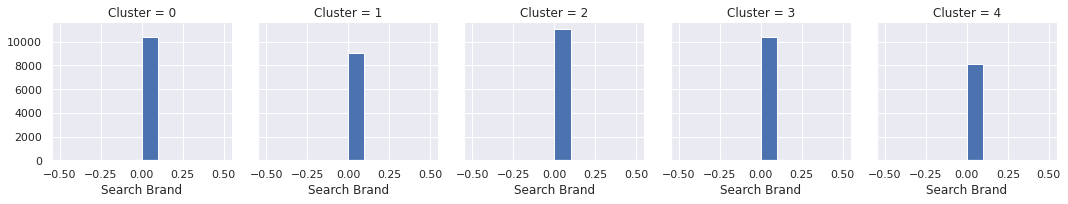

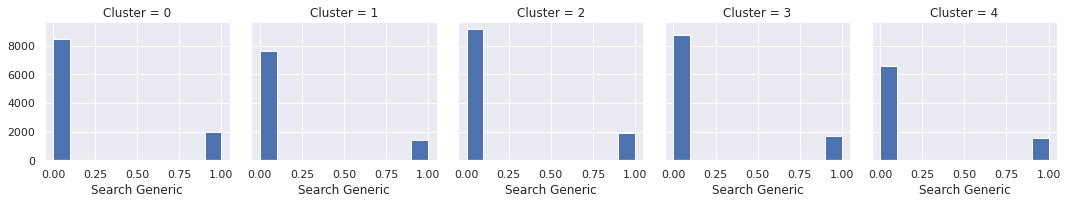

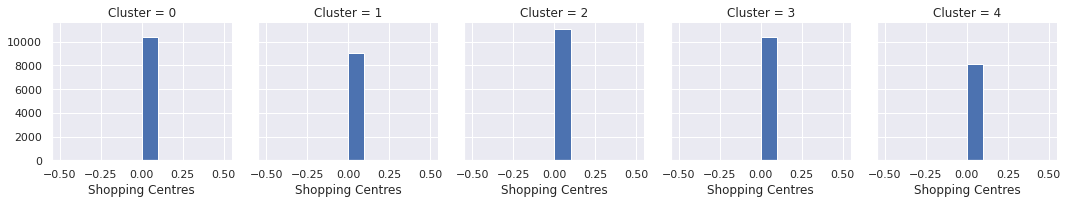

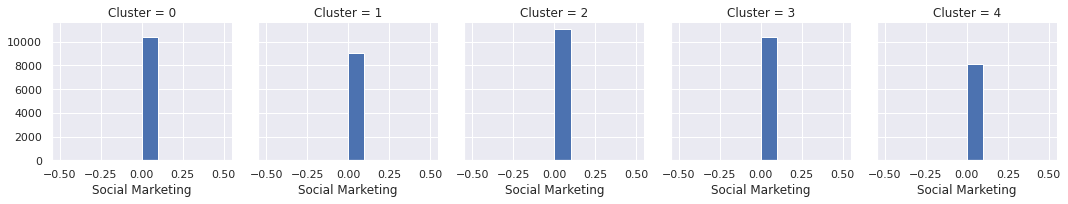

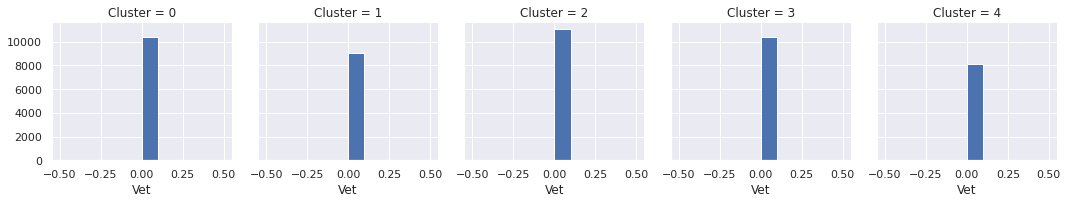

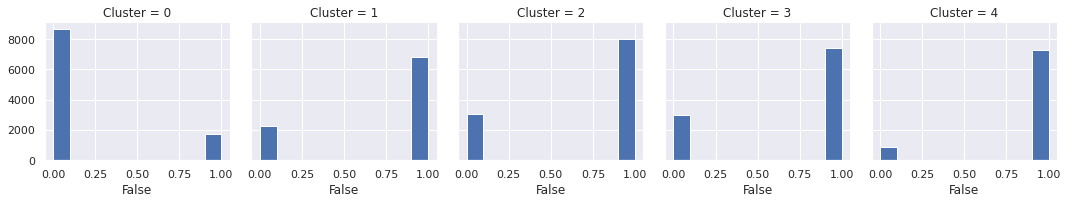

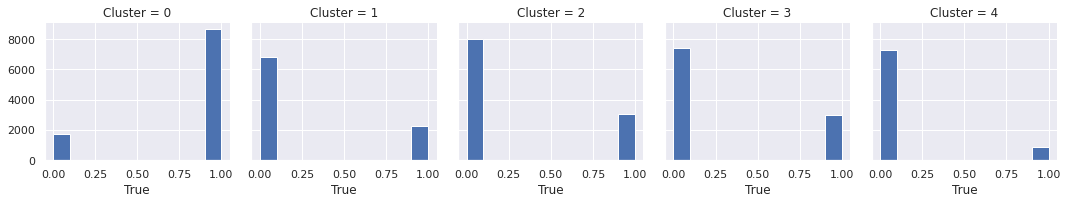

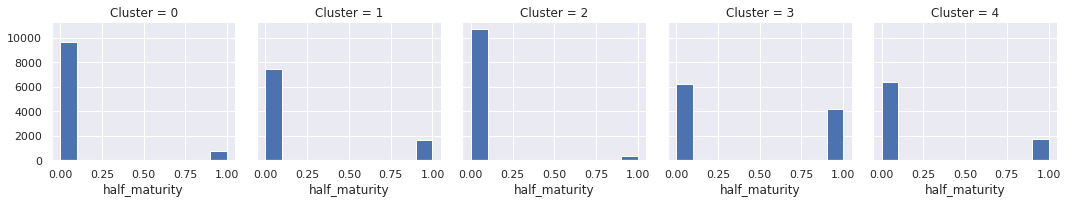

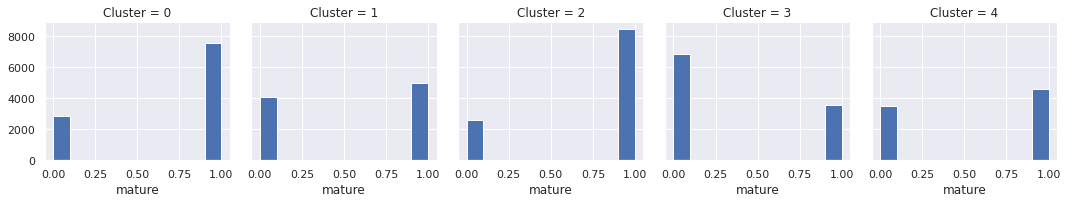

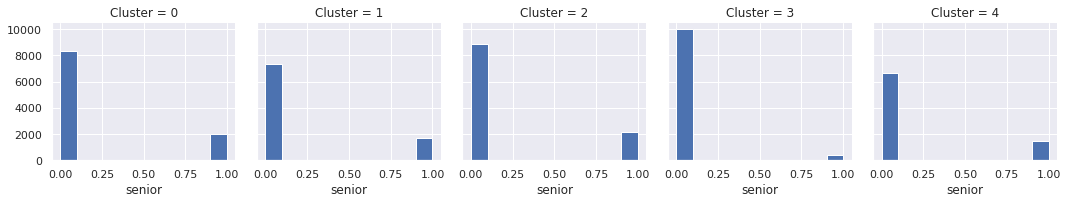

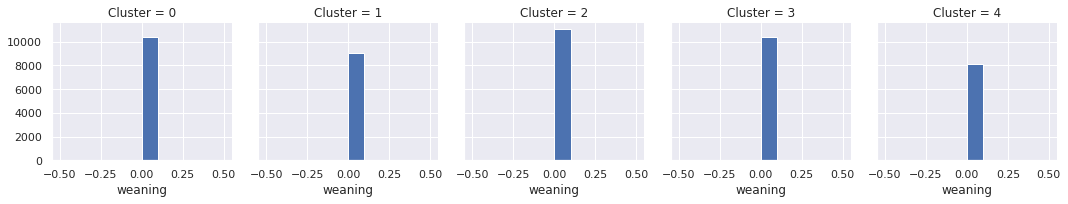

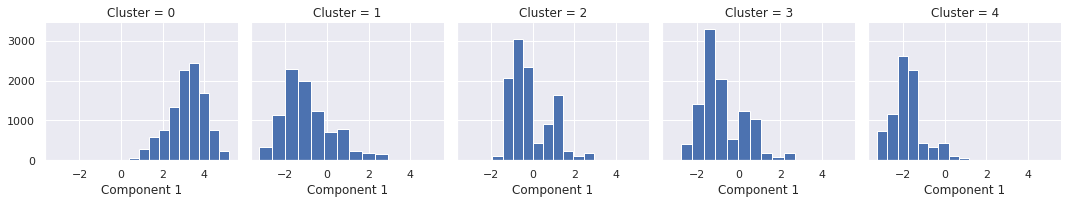

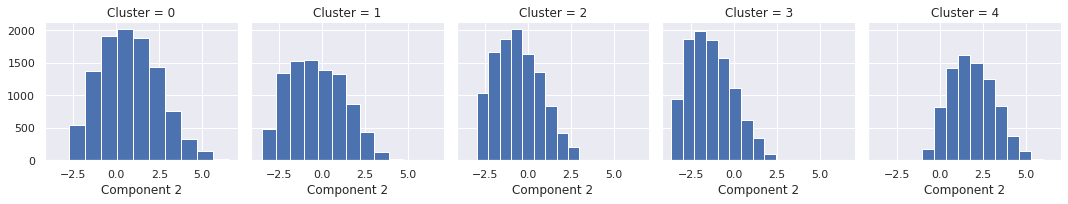

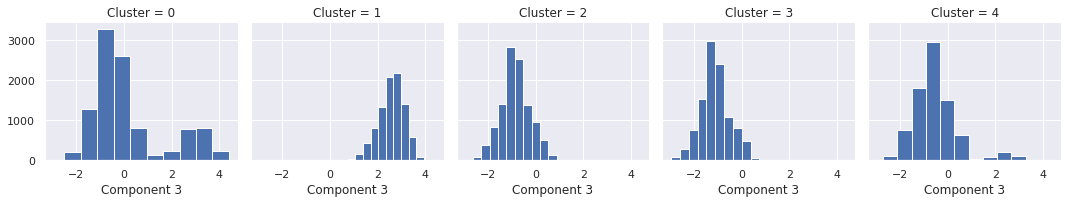

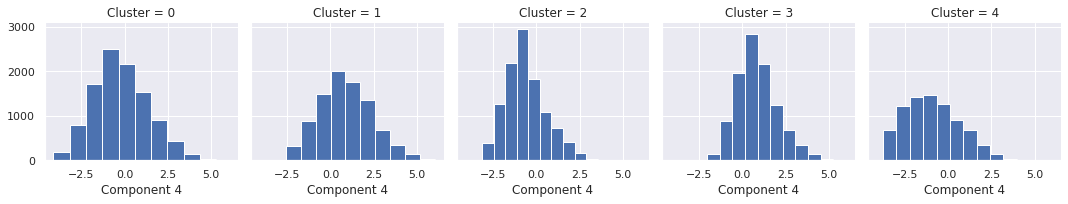

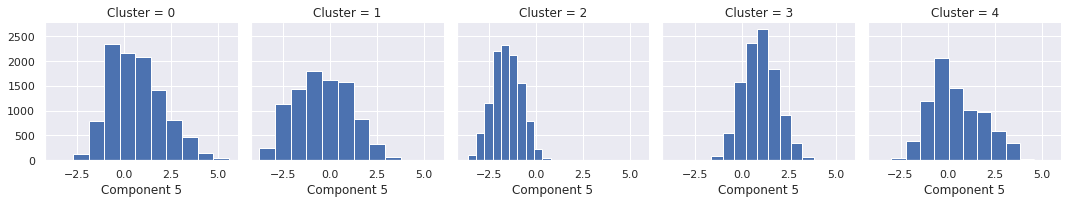

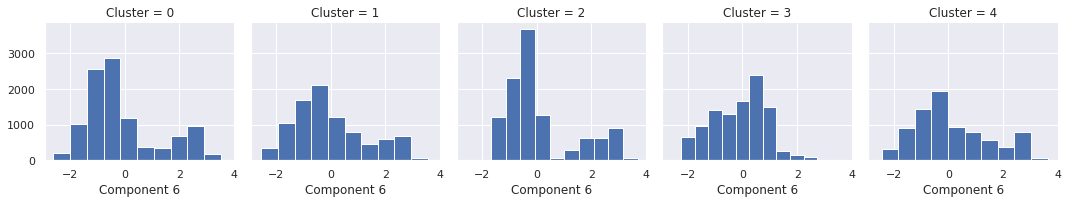

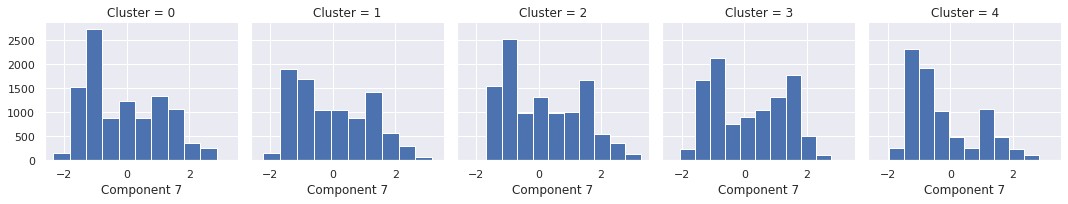

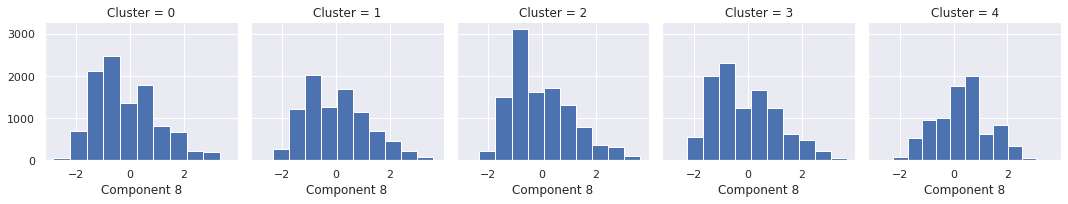

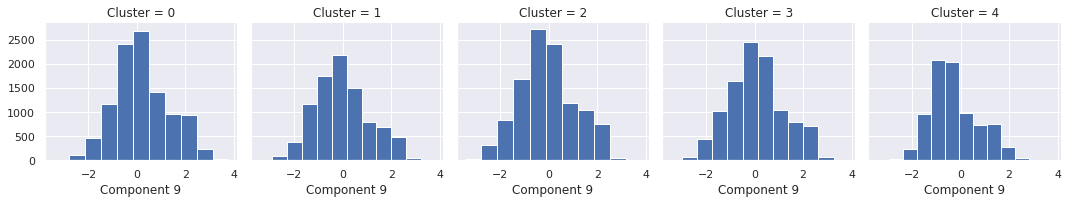

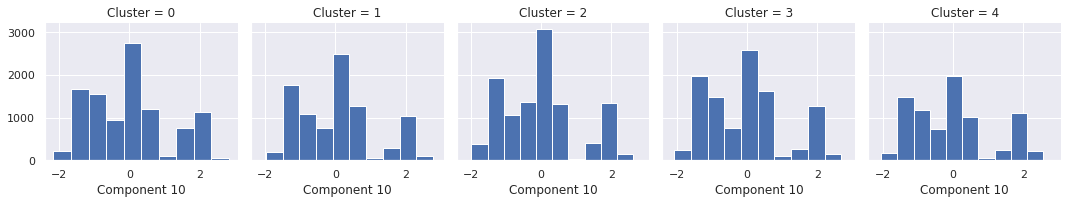

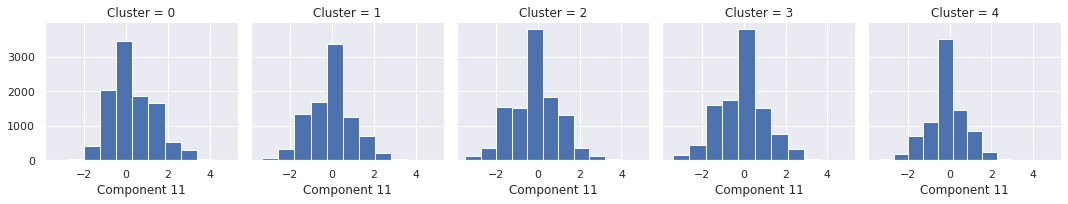

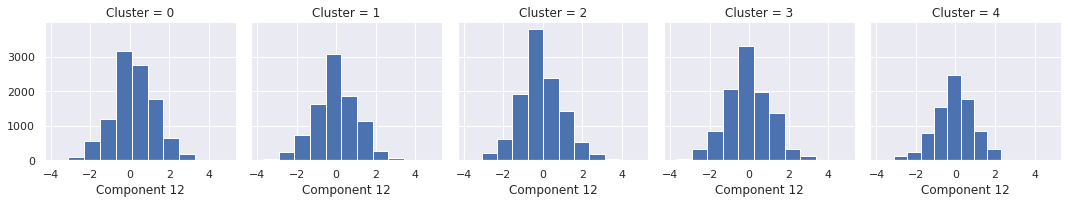

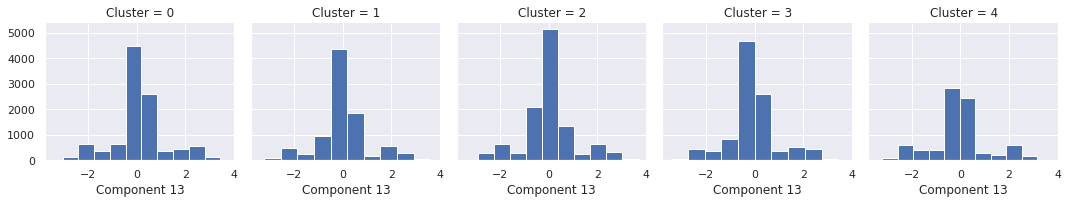

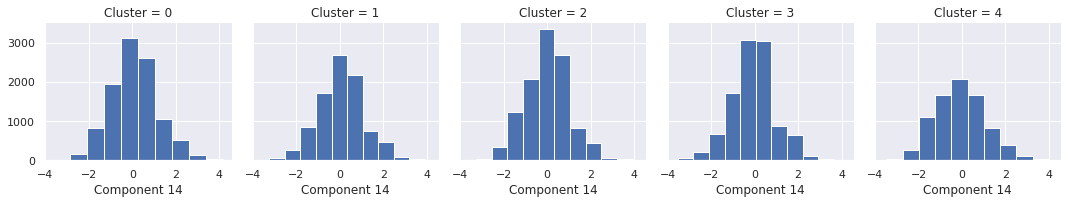

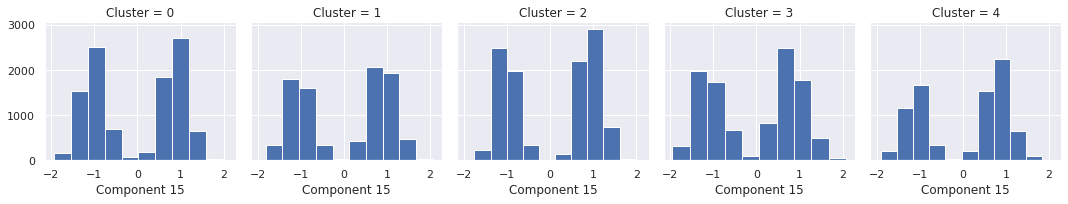

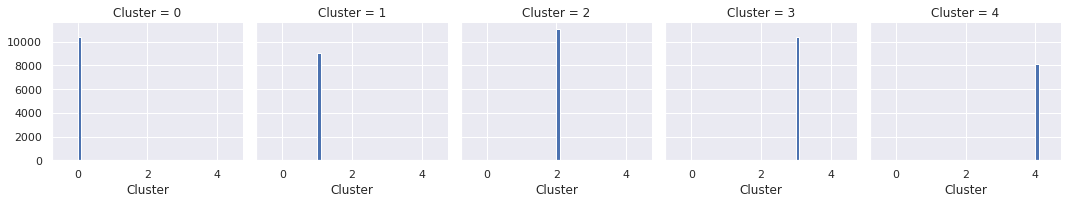

In [168]:
#Interpretation of results
for cluster in df_seg_pca_kmeans:
    grid = sns.FacetGrid(df_seg_pca_kmeans, col='Cluster')
    grid.map(plt.hist, cluster)

In [169]:
# labels = df.head(0,:14)

labels = df.iloc[0,:14]

print(labels)

print()
clusters = kmeans_pca.labels_
print(clusters)

pet_order_number                                 2.000
kibble_kcal                                  36876.724
wet_kcal                                      1234.650
total_order_kcal                             38111.374
wet_trays                                       11.000
wet_tray_size                                  150.000
premium_treat_packs                              0.000
dental_treat_packs                               0.000
total_web_sessions                               6.000
total_web_sessions_since_last_order              4.000
total_minutes_on_website                       101.000
total_minutes_on_website_since_last_order       32.000
total_wet_food_updates                           0.000
total_wet_food_updates_since_last_order          0.000
Name: 0, dtype: float64

[0 2 0 ... 2 1 1]


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49042 entries, 0 to 49041
Data columns (total 45 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   pet_order_number                           49042 non-null  int64  
 1   kibble_kcal                                49042 non-null  float64
 2   wet_kcal                                   49042 non-null  float64
 3   total_order_kcal                           49042 non-null  float64
 4   wet_trays                                  49042 non-null  int64  
 5   wet_tray_size                              49042 non-null  int64  
 6   premium_treat_packs                        49042 non-null  int64  
 7   dental_treat_packs                         49042 non-null  int64  
 8   total_web_sessions                         49042 non-null  int64  
 9   total_web_sessions_since_last_order        49042 non-null  int64  
 10  total_minutes_on_websi

# **Breakdown of Clusters**

1.   Number of rows in each cluster


In [171]:
from collections import Counter
import pandas as pd
import statistics as st

pd.set_option('display.max_columns', None)

print("Labels for features:\n")
print(df.head(0))
print()
clusters = kmeans_pca.labels_
clusters = Counter(clusters)
print("\nNumber of data points in each Cluster:\n")
print(clusters)
print()

print("Labels:\n")
print(labels)
print()

#for col in df[col]:
#  # print(l)
#  print(st.median(df[col[:]]))
#  print(st.stdev(df[col[:]]))
#  print(st.variance(df[col[:]]))
#print()

Labels for features:

Empty DataFrame
Columns: [pet_order_number, kibble_kcal, wet_kcal, total_order_kcal, wet_trays, wet_tray_size, premium_treat_packs, dental_treat_packs, total_web_sessions, total_web_sessions_since_last_order, total_minutes_on_website, total_minutes_on_website_since_last_order, total_wet_food_updates, total_wet_food_updates_since_last_order, mid, premium, superpremium, neutered_False, neutered_True, female, male, giant, large, medium, small, toy, Affiliates, Digital Display, Events, Incompletes, Inserts, Null & Default, Other, Refer a Friend, Search Brand, Search Generic, Shopping Centres, Social Marketing, Vet, False, True, half_maturity, mature, senior, weaning]
Index: []


Number of data points in each Cluster:

Counter({2: 11045, 3: 10411, 0: 10393, 1: 9044, 4: 8149})

Labels:

pet_order_number                                 2.000
kibble_kcal                                  36876.724
wet_kcal                                      1234.650
total_order_kcal     

In [172]:
df_seg_pca_kmeans['segclus'] = df_seg_pca_kmeans['Cluster'].map({1:'Wet Food=High ; DryFood=Medium ; WebTime=Highest ; WebFrcy=Highest',
                                                                 2:'Wet Food=Lowest ; DryFood=Medium ; WebTime=Lowest ; WebFrcy=Lowest',
                                                                 3:'Wet Food=Lowest ; DryFood=Medium ; WebTime=Lowest ; WebFrcy=Lowest',
                                                                 4:'Wet Food=Lowest ; DryFood=Lowest ; WebTime=Lowest ; WebFrcy=Lowest',
                                                                 5:'Wet Food=Lowest ; DryFood=Highest ; WebTime=Medium ; WebFrcy=Medium',})

                                                                 #5:'Cluster 5 description',
                                                                 #6:'Cluster 6 description',})
                                                                 #7:'Cluster 7 description',
                                                                 #8:'Cluster 8 description',
                                                                 #9:'Cluster 9 description',
                                                                 #10:'Cluster 10 description',
                                                                 #11:'Cluster 11 description',
                                                                 #12:'Cluster 12 description',
                                                                 #13:'Cluster 13 description',
                                                                 #14:'Cluster 14 description',
                                                                 #15:'Cluster 15 description',
                                                                 #16:'Cluster 16 description',
                                                                 #17:'Cluster 17 description',
                                                                 #18:'Cluster 18 description',
                                                                 #19:'Cluster 19 description',
                                                                 #20:'Cluster 20 description',})

# **Scatterplots**

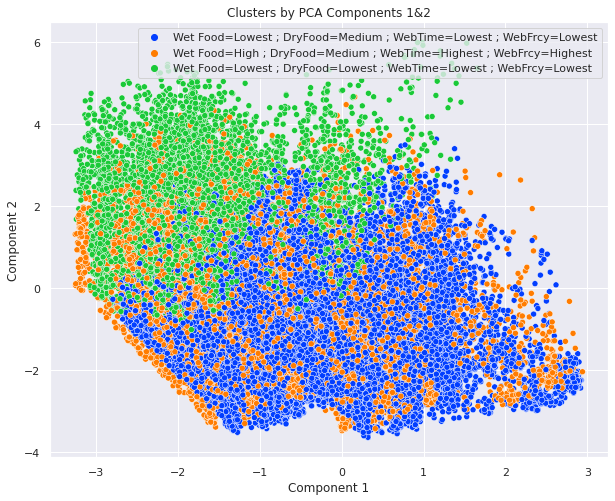

In [173]:
#Visualising the final data
x_axis = df_seg_pca_kmeans['Component 1']
y_axis = df_seg_pca_kmeans['Component 2']

plt.figure(figsize=(10,8))
#sns.scatterplot(x_axis, y_axis, hue=df_seg_pca_kmeans['segclus'], palette=['g','r','c'])

color = (sns.dark_palette("purple"))
sns.set()
sns.scatterplot(x_axis, y_axis, hue=df_seg_pca_kmeans['segclus'], palette='bright')

plt.title('Clusters by PCA Components 1&2')
plt.savefig('Clusters by PCA Components 1&2.png')
plt.legend()

# sns.scatterplot(data=s, x='A', y='B', hue='C', palette='bright')

In [174]:
#Visualising the final data
x_axis = df_seg_pca_kmeans['Component 3']
y_axis = df_seg_pca_kmeans['Component 4']
plt.figure(figsize=(10,8))
#sns.scatterplot(x_axis, y_axis, hue=df_seg_pca_kmeans['segclus'], palette=['g','r','c']) # palette='bright'
sns.scatterplot(x_axis, y_axis, hue=df_seg_pca_kmeans['segclus'], palette='bright') # palette='bright'
plt.title('Clusters by PCA Components 3&4')
plt.savefig('Clusters by PCA Components 3&4.png')

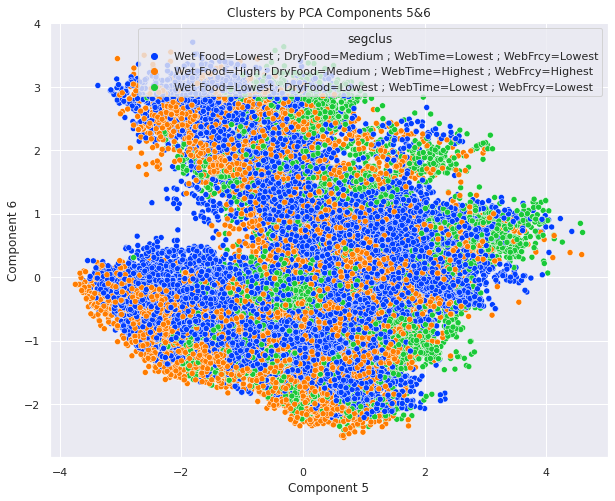

In [175]:
#Visualising the final data
x_axis = df_seg_pca_kmeans['Component 5']
y_axis = df_seg_pca_kmeans['Component 6']
plt.figure(figsize=(10,8))
# sns.scatterplot(x_axis, y_axis, hue=df_seg_pca_kmeans['segclus'], palette=['g','r','c']) # palette='bright'
sns.scatterplot(x_axis, y_axis, hue=df_seg_pca_kmeans['segclus'], palette='bright') # palette='bright'
plt.title('Clusters by PCA Components 5&6')
plt.savefig('Clusters by PCA Components 5&6')

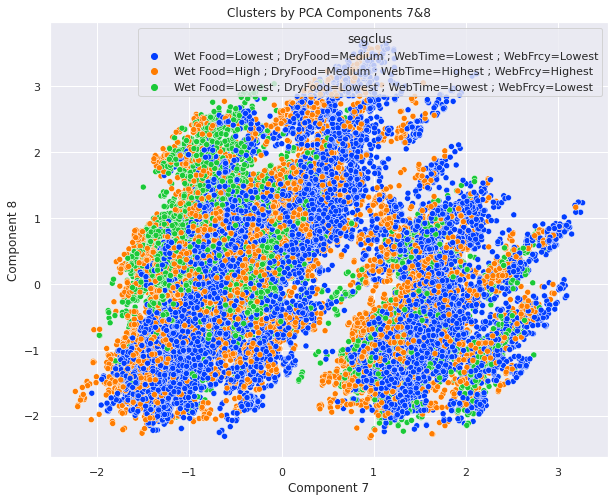

In [176]:
#Visualising the final data
x_axis = df_seg_pca_kmeans['Component 7']
y_axis = df_seg_pca_kmeans['Component 8']
plt.figure(figsize=(10,8))
# sns.scatterplot(x_axis, y_axis, hue=df_seg_pca_kmeans['segclus'], palette=['g','r','c']) # palette='bright'
sns.scatterplot(x_axis, y_axis, hue=df_seg_pca_kmeans['segclus'], palette='bright') # palette='bright'
plt.title('Clusters by PCA Components 7&8')
plt.savefig('Clusters by PCA Components 7&8')

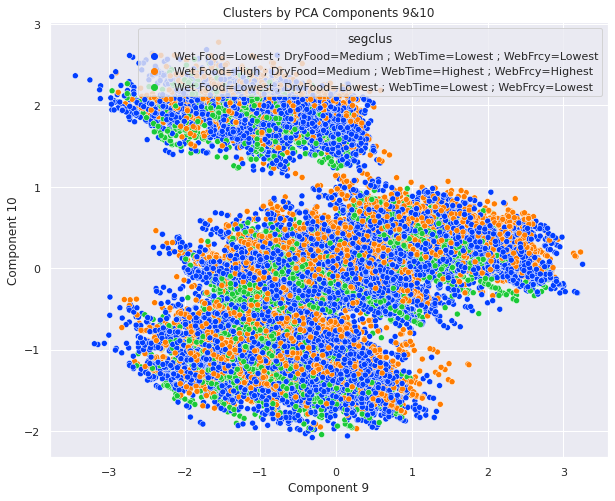

In [177]:
#Visualising the final data
x_axis = df_seg_pca_kmeans['Component 9']
y_axis = df_seg_pca_kmeans['Component 10']
plt.figure(figsize=(10,8))
# sns.scatterplot(x_axis, y_axis, hue=df_seg_pca_kmeans['segclus'], palette=['g','r','c']) # palette='bright'
sns.scatterplot(x_axis, y_axis, hue=df_seg_pca_kmeans['segclus'], palette='bright') # palette='bright'
plt.title('Clusters by PCA Components 9&10')
plt.savefig('Clusters by PCA Components 9&10')

In [178]:
#Visualising the final data
x_axis = df_seg_pca_kmeans['Component 11']
y_axis = df_seg_pca_kmeans['Component 12']
plt.figure(figsize=(10,8))
# sns.scatterplot(x_axis, y_axis, hue=df_seg_pca_kmeans['segclus'], palette=['g','r','c']) # palette='bright'
sns.scatterplot(x_axis, y_axis, hue=df_seg_pca_kmeans['segclus'], palette='bright') # palette='bright'
plt.title('Clusters by PCA Components 11&12')
plt.savefig('Clusters by PCA Components 11&12')

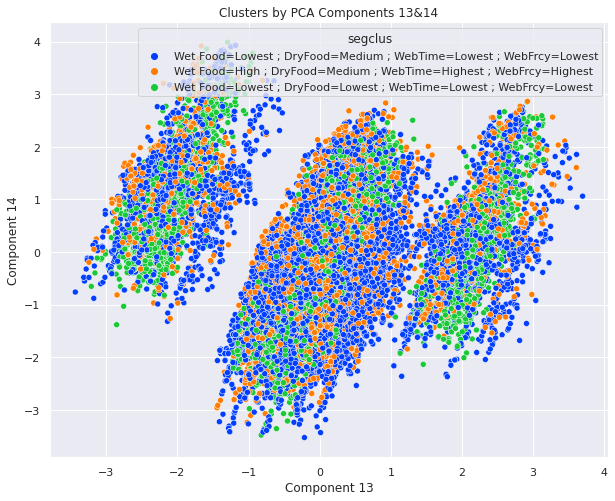

In [179]:
#Visualising the final data
x_axis = df_seg_pca_kmeans['Component 13']
y_axis = df_seg_pca_kmeans['Component 14']
plt.figure(figsize=(10,8))
# sns.scatterplot(x_axis, y_axis, hue=df_seg_pca_kmeans['segclus'], palette=['g','r','c']) # palette='bright'
sns.scatterplot(x_axis, y_axis, hue=df_seg_pca_kmeans['segclus'], palette='bright') # palette='bright'
plt.title('Clusters by PCA Components 13&14')
plt.savefig('Clusters by PCA Components 13&14')

# **Evaluation - Silouhette Analysis**

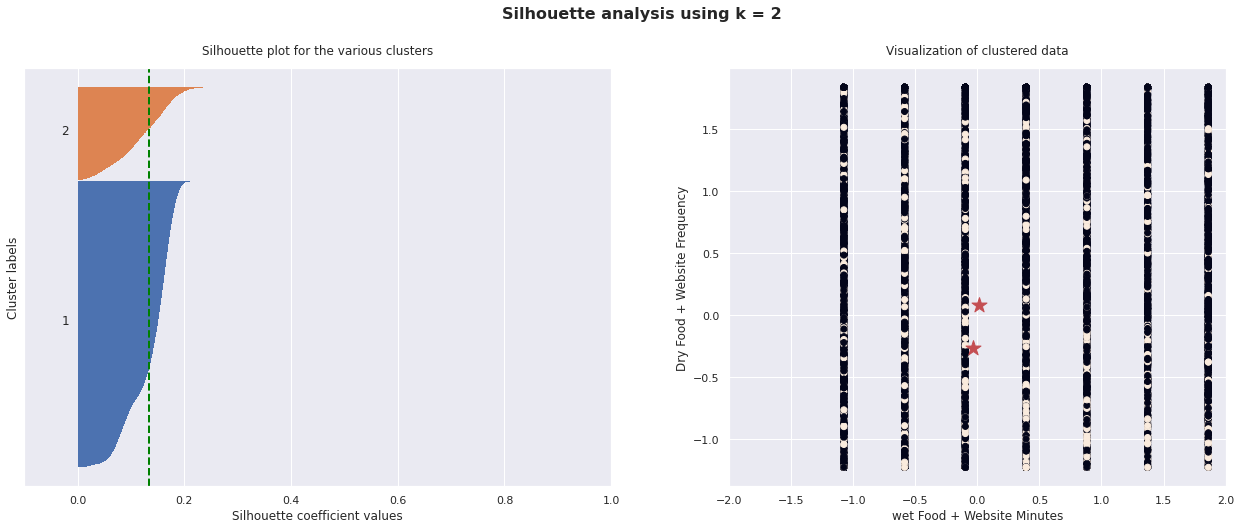

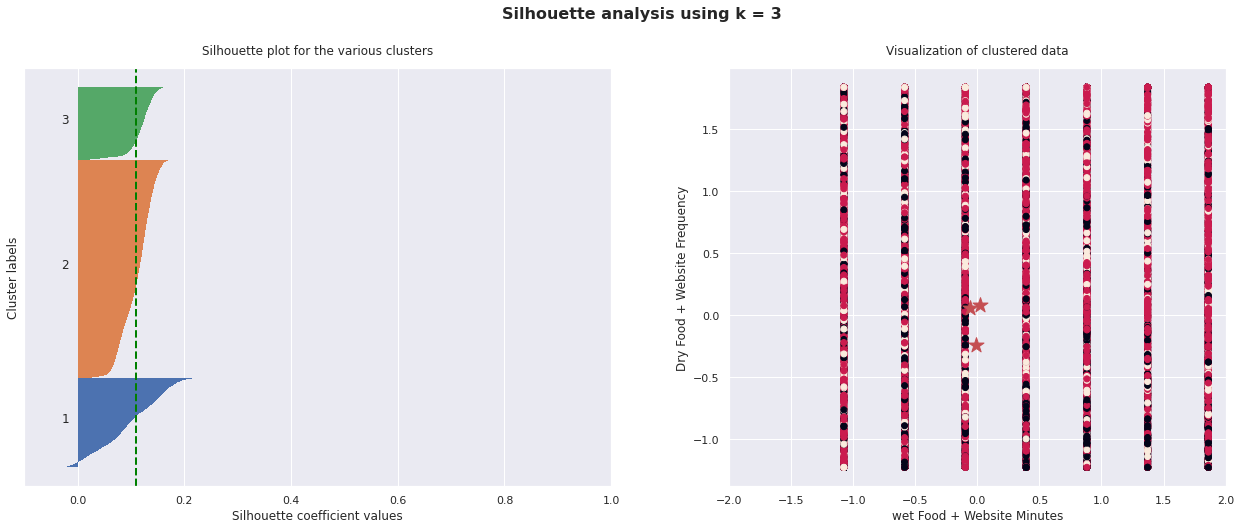

In [180]:
# Silouhette Analysis

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    # labels = km.fit_predict(X_std)
    
    labels = km.fit_predict(df_std) # pca_scores # df_std
    centroids = km.cluster_centers_

    # Get silhouette samples
    # silhouette_vals = silhouette_samples(X_std, labels)
    # silhouette_vals = km.silhouette_samples(df_std, labels)

    silhouette_vals = silhouette_samples(df_std, labels)
    
    

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    # ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(df_std[:, 0], df_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('wet Food + Website Minutes')
    ax2.set_ylabel('Dry Food + Website Frequency')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);